## 1. Understanding the data

 (I have timestamp and a value given by TS tool for those 6 type of news people reaction: more postive may be good reaction and the more negative is bad reaction) (Close price is the dependent variable)
 
### 1.1. Hypothesis Generation
Point out factors affecting the dependent variable (price).
* Which of those time series has an impact on cocoa future price?
* Combinning two of them(Price forcast news and Weather damage news) does it improve?
* Are those 6 diffrent varaibles correlate eachother (have those news has similarity between them)?
* Is it possible to make a settle price direction forcast through the news?

### 1.2.Importing neccessary libraries, loading the dataset and do some preprocesses

In [74]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime    # To access datetime 
from matplotlib import pyplot
import seaborn as sns 
import pandas_profiling
#from pandas.plotting import scatter_matrix

## Cleanning data

In [75]:
# Changing the object datatype of Exchange date into datetime64 
df_main = pd.read_csv('LCCc1_oct.csv', parse_dates=['Exchange Date'])
df_main.head()

Close price Exchange Date
0         561    2000-01-04
1         560    2000-01-05
2         556    2000-01-06
3         564    2000-01-07
4         565    2000-01-10

In [76]:
#df_main.info()

### Price forcast

In [77]:
# Changing "object" datatype of 'coc_mpyns_prfr' Timestamp into datetime format  
df_mpyns_p = pd.read_csv('price_forecast-coc_mpyns_prfr.csv', parse_dates=['Timestamp'])
df_mpyns_p.head()

LQC(coc_mpyns_prfr)  Timestamp
0                  0.0 2000-01-01
1                  0.0 2000-01-02
2                  0.0 2000-01-03
3                  0.0 2000-01-04
4                  0.0 2000-01-05

In [78]:
#df_mpyns_p.info()

In [79]:
# Merging the main dataframe to df_mpyns
df_merge1 = df_main.merge(df_mpyns_p, left_on='Exchange Date', right_on='Timestamp')

In [80]:
df_merge1.head()

Close price Exchange Date  LQC(coc_mpyns_prfr)  Timestamp
0         561    2000-01-04             0.000000 2000-01-04
1         560    2000-01-05             0.000000 2000-01-05
2         556    2000-01-06            -0.004343 2000-01-06
3         564    2000-01-07             0.002181 2000-01-07
4         565    2000-01-10            -0.014851 2000-01-10

In [81]:
# Changing the coc_mpys_prfr object datatype to datetime 
df_mpys_p = pd.read_csv('price_forecast-coc_mpys_prfr.csv', parse_dates=['Timestamp'])
df_mpys_p.head()

LQC(coc_mpys_prfr)  Timestamp
0                 0.0 2000-01-01
1                 0.0 2000-01-02
2                 0.0 2000-01-03
3                 0.0 2000-01-04
4                 0.0 2000-01-05

In [82]:
#df_mpys_p.info()

In [83]:
# Merging df_merge with df_mpys
df_merge2 = df_merge1.merge(df_mpys_p, left_on='Exchange Date', right_on='Timestamp')
df_merge2.head()

Close price Exchange Date  LQC(coc_mpyns_prfr) Timestamp_x  \
0         561    2000-01-04             0.000000  2000-01-04   
1         560    2000-01-05             0.000000  2000-01-05   
2         556    2000-01-06            -0.004343  2000-01-06   
3         564    2000-01-07             0.002181  2000-01-07   
4         565    2000-01-10            -0.014851  2000-01-10   

   LQC(coc_mpys_prfr) Timestamp_y  
0                 0.0  2000-01-04  
1                 0.0  2000-01-05  
2                 0.0  2000-01-06  
3                 0.0  2000-01-07  
4                 0.0  2000-01-10

In [84]:
# Deleting the unwanted or duplecated date
del df_merge2['Timestamp_x']
del df_merge2['Timestamp_y']
df_merge2.head()

Close price Exchange Date  LQC(coc_mpyns_prfr)  LQC(coc_mpys_prfr)
0         561    2000-01-04             0.000000                 0.0
1         560    2000-01-05             0.000000                 0.0
2         556    2000-01-06            -0.004343                 0.0
3         564    2000-01-07             0.002181                 0.0
4         565    2000-01-10            -0.014851                 0.0

In [85]:
# Changing the coc_mpys_prfr object datatype to datetime 
df_mpyn_p = pd.read_csv('price_forecast-coc_mpyn_prfr.csv', parse_dates=['Timestamp'])
df_mpyn_p.head()

LQC(coc_mpyn_prfr)  Timestamp
0                 0.0 2000-01-01
1                 0.0 2000-01-02
2                 0.0 2000-01-03
3                 0.0 2000-01-04
4                 0.0 2000-01-05

In [86]:
# Merging
df_merge3 = df_merge2.merge(df_mpyn_p, left_on='Exchange Date', right_on='Timestamp')
df_merge3.head()

Close price Exchange Date  LQC(coc_mpyns_prfr)  LQC(coc_mpys_prfr)  \
0         561    2000-01-04             0.000000                 0.0   
1         560    2000-01-05             0.000000                 0.0   
2         556    2000-01-06            -0.004343                 0.0   
3         564    2000-01-07             0.002181                 0.0   
4         565    2000-01-10            -0.014851                 0.0   

   LQC(coc_mpyn_prfr)  Timestamp  
0            0.000000 2000-01-04  
1            0.000000 2000-01-05  
2           -0.004343 2000-01-06  
3            0.002181 2000-01-07  
4           -0.014851 2000-01-10

In [87]:
# delete the unwanted time "Timestamp"
del df_merge3['Timestamp']
df_merge3.head()

Close price Exchange Date  LQC(coc_mpyns_prfr)  LQC(coc_mpys_prfr)  \
0         561    2000-01-04             0.000000                 0.0   
1         560    2000-01-05             0.000000                 0.0   
2         556    2000-01-06            -0.004343                 0.0   
3         564    2000-01-07             0.002181                 0.0   
4         565    2000-01-10            -0.014851                 0.0   

   LQC(coc_mpyn_prfr)  
0            0.000000  
1            0.000000  
2           -0.004343  
3            0.002181  
4           -0.014851

In [88]:
#df_merge3.info()

### Weather Damage

In [89]:
# Changing the 'object' datatype into 'datetime' 
df_mpyns_w = pd.read_csv('weather_damage_coc-mpyns-wdam.csv', parse_dates=['Timestamp'])
df_mpyns_w.head()

LQC(coc-mpyns-wdam)  Timestamp
0             0.018868 2000-01-01
1             0.123457 2000-01-02
2             0.014085 2000-01-03
3             0.000000 2000-01-04
4             0.000000 2000-01-05

In [90]:
#df_mpyns_w.info()

In [91]:
# Merging 'df_mpyns_w' with 'df_merge3'
df_merge4 = df_merge3.merge(df_mpyns_w, left_on='Exchange Date', right_on='Timestamp')
df_merge4.head()

Close price Exchange Date  LQC(coc_mpyns_prfr)  LQC(coc_mpys_prfr)  \
0         561    2000-01-04             0.000000                 0.0   
1         560    2000-01-05             0.000000                 0.0   
2         556    2000-01-06            -0.004343                 0.0   
3         564    2000-01-07             0.002181                 0.0   
4         565    2000-01-10            -0.014851                 0.0   

   LQC(coc_mpyn_prfr)  LQC(coc-mpyns-wdam)  Timestamp  
0            0.000000             0.000000 2000-01-04  
1            0.000000             0.000000 2000-01-05  
2           -0.004343             0.006369 2000-01-06  
3            0.002181             0.000000 2000-01-07  
4           -0.014851             0.000000 2000-01-10

In [92]:
# delete the unwanted time "Timestamp"
del df_merge4['Timestamp']
df_merge4.head()

Close price Exchange Date  LQC(coc_mpyns_prfr)  LQC(coc_mpys_prfr)  \
0         561    2000-01-04             0.000000                 0.0   
1         560    2000-01-05             0.000000                 0.0   
2         556    2000-01-06            -0.004343                 0.0   
3         564    2000-01-07             0.002181                 0.0   
4         565    2000-01-10            -0.014851                 0.0   

   LQC(coc_mpyn_prfr)  LQC(coc-mpyns-wdam)  
0            0.000000             0.000000  
1            0.000000             0.000000  
2           -0.004343             0.006369  
3            0.002181             0.000000  
4           -0.014851             0.000000

In [93]:
# Changing the 'object' datatype into 'datetime' 
df_mpyn_w = pd.read_csv('weather_damage_coc-mpyn-wdam.csv', parse_dates=['Timestamp'])
df_mpyn_w.head()

LQC(coc-mpyn-wdam)  Timestamp
0            0.000000 2000-01-01
1            0.000000 2000-01-02
2            0.333333 2000-01-03
3            0.000000 2000-01-04
4            0.000000 2000-01-05

In [94]:
# Merging 'df_mpyn_w' with 'df_merge4'
df_merge5 = df_merge4.merge(df_mpyn_w, left_on='Exchange Date', right_on='Timestamp')
df_merge5.head()

Close price Exchange Date  LQC(coc_mpyns_prfr)  LQC(coc_mpys_prfr)  \
0         561    2000-01-04             0.000000                 0.0   
1         560    2000-01-05             0.000000                 0.0   
2         556    2000-01-06            -0.004343                 0.0   
3         564    2000-01-07             0.002181                 0.0   
4         565    2000-01-10            -0.014851                 0.0   

   LQC(coc_mpyn_prfr)  LQC(coc-mpyns-wdam)  LQC(coc-mpyn-wdam)  Timestamp  
0            0.000000             0.000000            0.000000 2000-01-04  
1            0.000000             0.000000            0.000000 2000-01-05  
2           -0.004343             0.006369            0.095238 2000-01-06  
3            0.002181             0.000000            0.000000 2000-01-07  
4           -0.014851             0.000000            0.000000 2000-01-10

In [95]:
# delete the unwanted time "Timestamp"
del df_merge5['Timestamp']
df_merge5.head()

Close price Exchange Date  LQC(coc_mpyns_prfr)  LQC(coc_mpys_prfr)  \
0         561    2000-01-04             0.000000                 0.0   
1         560    2000-01-05             0.000000                 0.0   
2         556    2000-01-06            -0.004343                 0.0   
3         564    2000-01-07             0.002181                 0.0   
4         565    2000-01-10            -0.014851                 0.0   

   LQC(coc_mpyn_prfr)  LQC(coc-mpyns-wdam)  LQC(coc-mpyn-wdam)  
0            0.000000             0.000000            0.000000  
1            0.000000             0.000000            0.000000  
2           -0.004343             0.006369            0.095238  
3            0.002181             0.000000            0.000000  
4           -0.014851             0.000000            0.000000

In [96]:
# Changing the 'object' datatype into 'datetime' 
df_mpys_w = pd.read_csv('weather_damage_coc-mpys-wdam.csv', parse_dates=['Timestamp'])
df_mpys_w.head()

LQC(coc-mpys-wdam)  Timestamp
0            0.018868 2000-01-01
1            0.123457 2000-01-02
2            0.014085 2000-01-03
3            0.000000 2000-01-04
4            0.000000 2000-01-05

In [97]:
# Merging 'df_mpyn_w' with 'df_merge5'
df_merge6 = df_merge5.merge(df_mpys_w, left_on='Exchange Date', right_on='Timestamp')
df_merge6.head()

Close price Exchange Date  LQC(coc_mpyns_prfr)  LQC(coc_mpys_prfr)  \
0         561    2000-01-04             0.000000                 0.0   
1         560    2000-01-05             0.000000                 0.0   
2         556    2000-01-06            -0.004343                 0.0   
3         564    2000-01-07             0.002181                 0.0   
4         565    2000-01-10            -0.014851                 0.0   

   LQC(coc_mpyn_prfr)  LQC(coc-mpyns-wdam)  LQC(coc-mpyn-wdam)  \
0            0.000000             0.000000            0.000000   
1            0.000000             0.000000            0.000000   
2           -0.004343             0.006369            0.095238   
3            0.002181             0.000000            0.000000   
4           -0.014851             0.000000            0.000000   

   LQC(coc-mpys-wdam)  Timestamp  
0            0.000000 2000-01-04  
1            0.000000 2000-01-05  
2            0.006369 2000-01-06  
3            0.000000 2000-01-07  
4            0.000000 2000-01-10

In [98]:
# delete the unwanted time "Timestamp"
del df_merge6['Timestamp']
df_merge6.head()

Close price Exchange Date  LQC(coc_mpyns_prfr)  LQC(coc_mpys_prfr)  \
0         561    2000-01-04             0.000000                 0.0   
1         560    2000-01-05             0.000000                 0.0   
2         556    2000-01-06            -0.004343                 0.0   
3         564    2000-01-07             0.002181                 0.0   
4         565    2000-01-10            -0.014851                 0.0   

   LQC(coc_mpyn_prfr)  LQC(coc-mpyns-wdam)  LQC(coc-mpyn-wdam)  \
0            0.000000             0.000000            0.000000   
1            0.000000             0.000000            0.000000   
2           -0.004343             0.006369            0.095238   
3            0.002181             0.000000            0.000000   
4           -0.014851             0.000000            0.000000   

   LQC(coc-mpys-wdam)  
0            0.000000  
1            0.000000  
2            0.006369  
3            0.000000  
4            0.000000

In [99]:
# Total extracted data
#df_merge6.info()

In [100]:
# Change the datatype of close price in to int
df_merge6['Close price'] = df_merge6['Close price'].str.replace(',','').astype(int) # Replace the comma ',' by nothing and change the data type of close price to integer 

In [101]:
# Change the column name of close price, and Exchange Date  
df_merge6.rename(columns={'Close price':'Close_price', 'Exchange Date':'Timestamp'
                         }, inplace=True)
 
#print(df_merge6.columns) # Check the changed column names 

In [102]:
#df_merge6.info()

## EDA (Exploratory Data Analysis)

### 1.3. Data Description


#### Column Name description
1. Close_price :- Previous COCOA closing price of each day.
2. Timestamp:-continious recorded time series data for about 20 years.
3. LQC(coc_mpyns_prfr):- Each day value given by TS on Cocoa Market pyscology news (social) price forcast.
4. LQC(coc_mpys_prfr) :- Each day value given by TS on Cocoa Market pyscology social media price forcast.
5. LQC(coc_mpyn_prfr) :- Each day value given by TS on Cocoa Market pyscology news price forcast.
6. LQC(coc-mpyns-wdam):- Each day value given by TS on Cocoa Market pyscology news (social) weather damage.
7. LQC(coc-mpyn-wdam):- Each day value given by TS on Cocoa Market pyscology news weather damage.
8. LQC(coc-mpys-wdam):- Each day value given by TS on Cocoa Market pyscology social media weather damage.

 Here "Close_price" is our dependent variable and the rest of the data is the independent variables or predictor variable.

Decribe what is descriptive statstics and Inferential statstics means and explain below statstis types 

Descriptive statstics

1. Measures of freqency:- numbers and percentiles
2. Measures of central tendency:- mean , meadian and mode 
3. measures of spread (desperssion):- standared deviation, variance and quartiles
4. Measures of position :- percentiles, quartiles and standared score

In [103]:
df_merge6.head()

Close_price  Timestamp  LQC(coc_mpyns_prfr)  LQC(coc_mpys_prfr)  \
0          561 2000-01-04             0.000000                 0.0   
1          560 2000-01-05             0.000000                 0.0   
2          556 2000-01-06            -0.004343                 0.0   
3          564 2000-01-07             0.002181                 0.0   
4          565 2000-01-10            -0.014851                 0.0   

   LQC(coc_mpyn_prfr)  LQC(coc-mpyns-wdam)  LQC(coc-mpyn-wdam)  \
0            0.000000             0.000000            0.000000   
1            0.000000             0.000000            0.000000   
2           -0.004343             0.006369            0.095238   
3            0.002181             0.000000            0.000000   
4           -0.014851             0.000000            0.000000   

   LQC(coc-mpys-wdam)  
0            0.000000  
1            0.000000  
2            0.006369  
3            0.000000  
4            0.000000

In [104]:
# Check the shape of the dataset
df_merge6.shape # The preproccesed dataset is 4808 rows by 8 column.

(4808, 8)

In [105]:
# General quantitative description of the data 
df_merge6.describe()

Close_price  LQC(coc_mpyns_prfr)  LQC(coc_mpys_prfr)  \
count  4808.000000          4808.000000         4808.000000   
mean   1429.751664             0.000824            0.001892   
std     519.695129             0.004773            0.027485   
min     508.000000            -0.050505           -0.200000   
25%     914.000000             0.000000            0.000000   
50%    1479.000000             0.000000            0.000000   
75%    1856.000000             0.001726            0.000000   
max    2713.000000             0.053425            1.000000   

       LQC(coc_mpyn_prfr)  LQC(coc-mpyns-wdam)  LQC(coc-mpyn-wdam)  \
count         4808.000000          4808.000000         4808.000000   
mean             0.000824             0.025440            0.063489   
std              0.004773             0.033412            0.165098   
min             -0.050505            -0.024390           -1.000000   
25%              0.000000             0.003840            0.000000   
50%              0.000000             0.014087            0.000000   
75%              0.001726             0.036103            0.043908   
max              0.053425             0.571429            1.000000   

       LQC(coc-mpys-wdam)  
count         4808.000000  
mean             0.025440  
std              0.033412  
min             -0.024390  
25%              0.003840  
50%              0.014087  
75%              0.036103  
max              0.571429

## Create an inline report

In [111]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [112]:
%%capture
import numpy as np 
import pandas as pd 
import pandas_profiling as pp

<IPython.core.display.Javascript object>


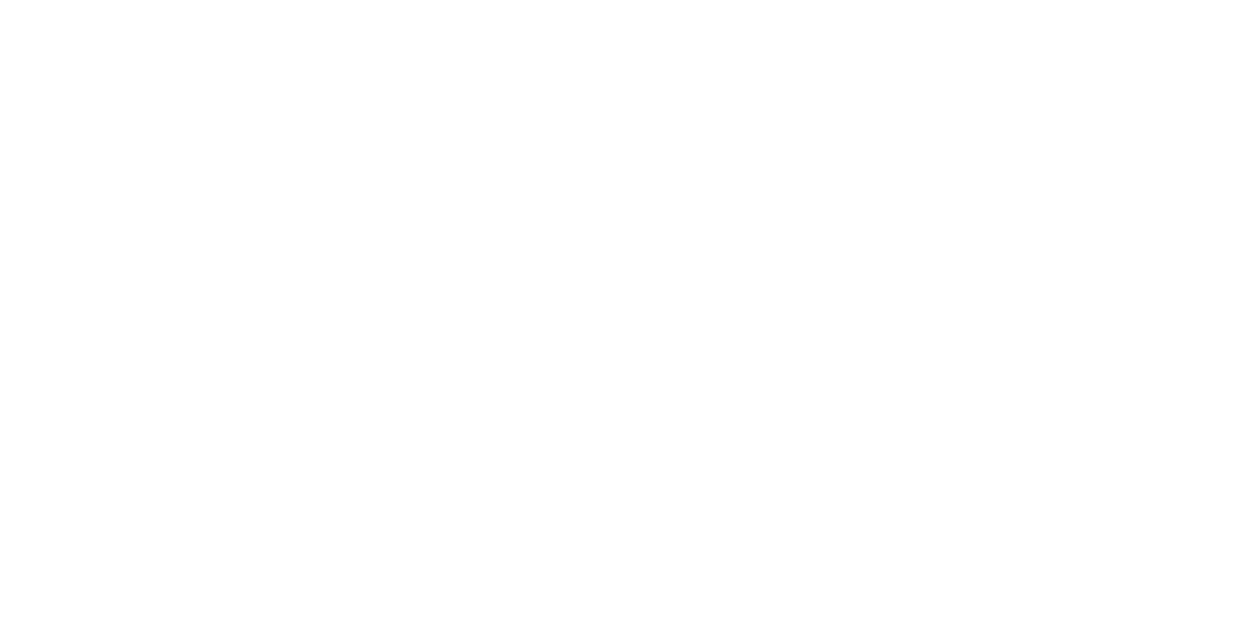

<IPython.core.display.Javascript object>


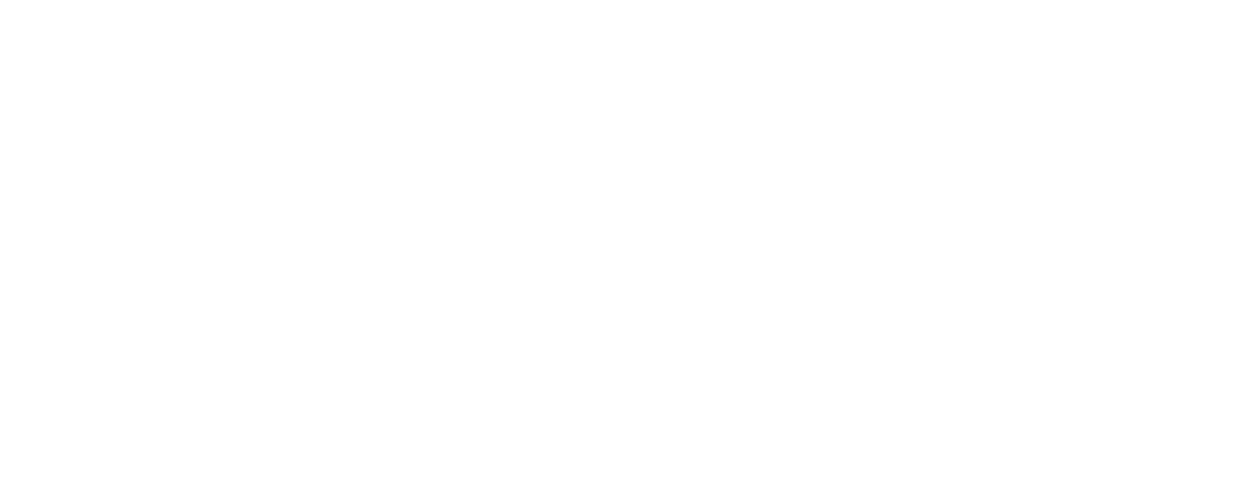

<IPython.core.display.Javascript object>


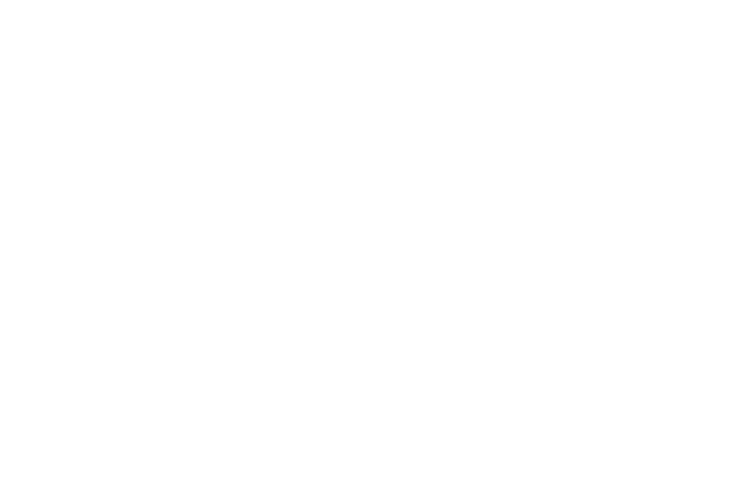

<IPython.core.display.Javascript object>


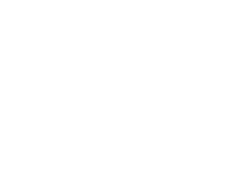

<IPython.core.display.Javascript object>


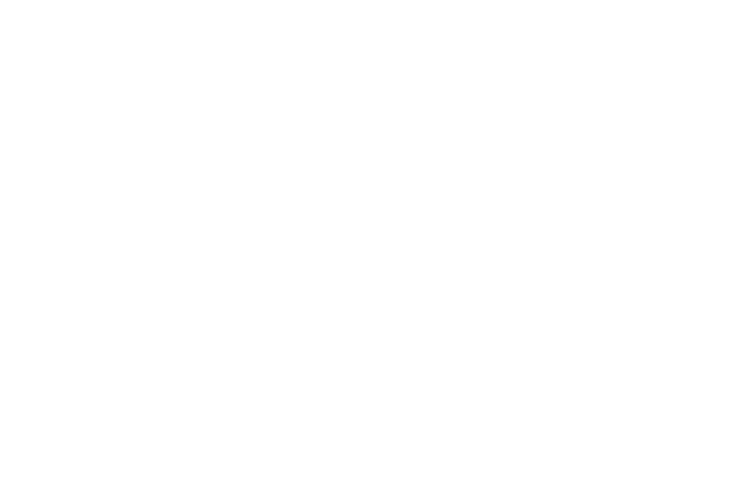

<IPython.core.display.Javascript object>


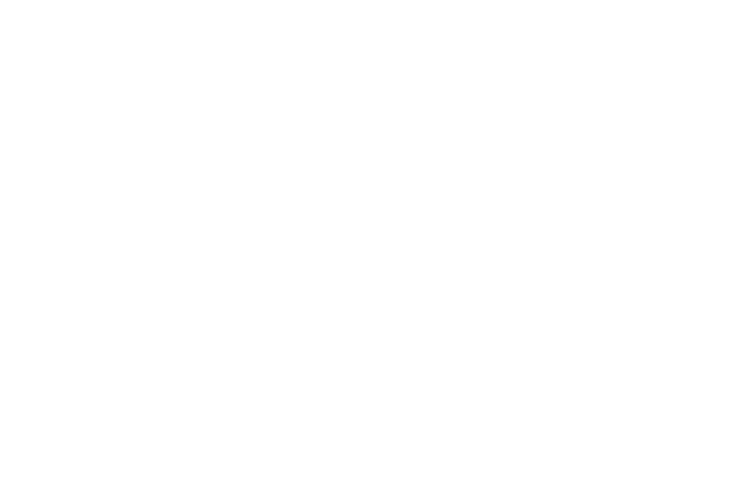

<IPython.core.display.Javascript object>


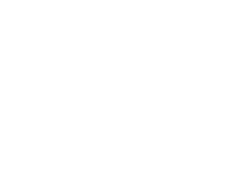

<IPython.core.display.Javascript object>


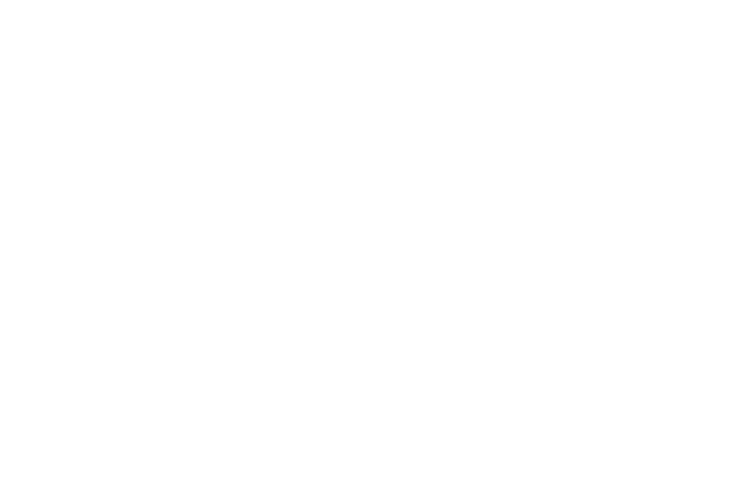

<IPython.core.display.Javascript object>


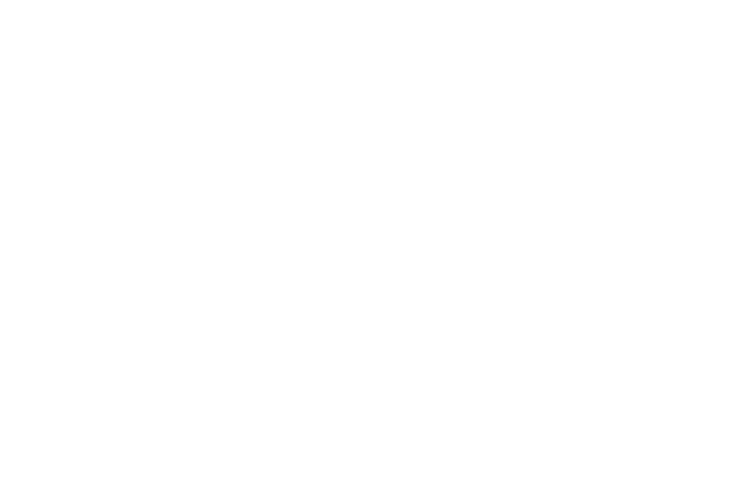

<IPython.core.display.Javascript object>


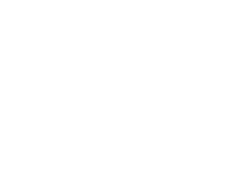

<IPython.core.display.Javascript object>


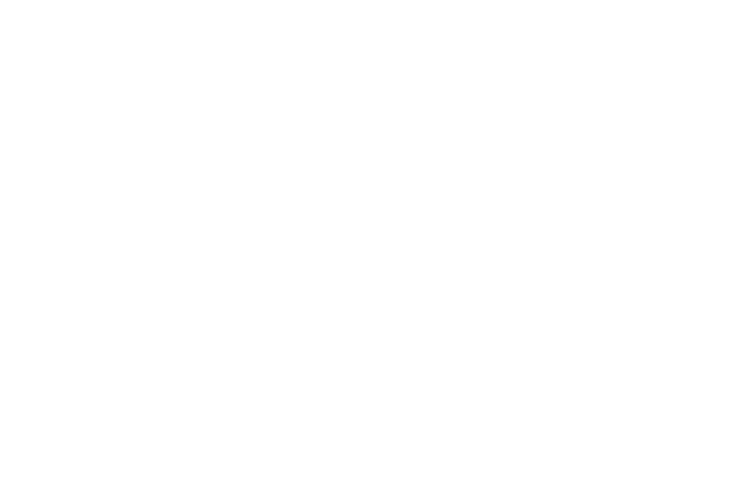

<IPython.core.display.Javascript object>


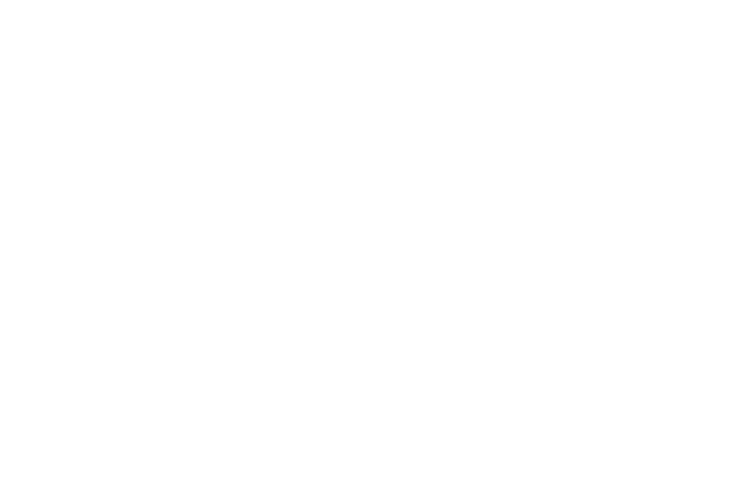

<IPython.core.display.Javascript object>


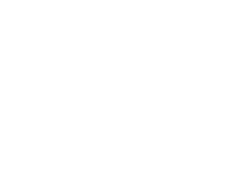

<IPython.core.display.Javascript object>


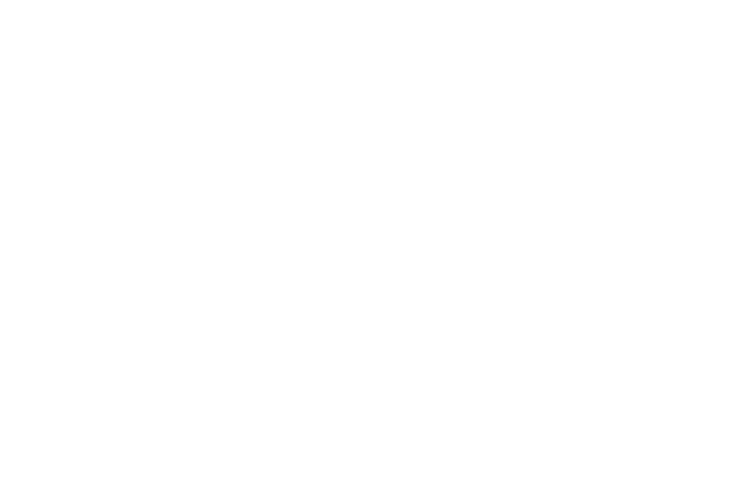

<IPython.core.display.Javascript object>


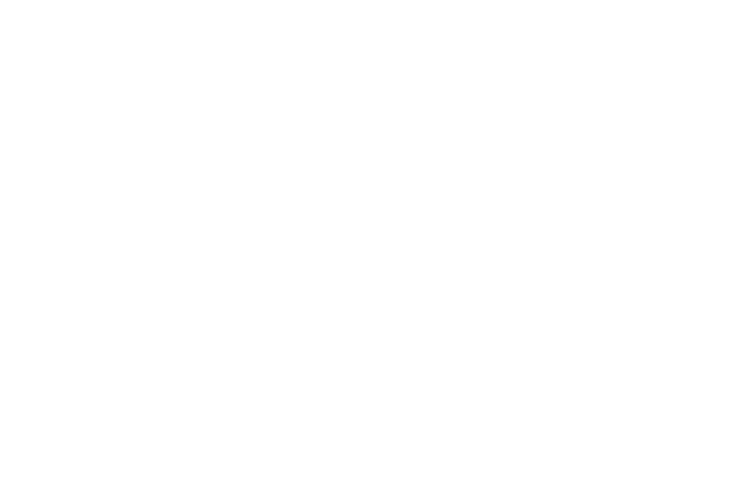

<IPython.core.display.Javascript object>


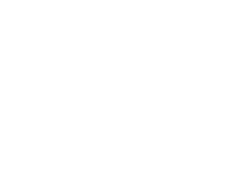

<IPython.core.display.Javascript object>


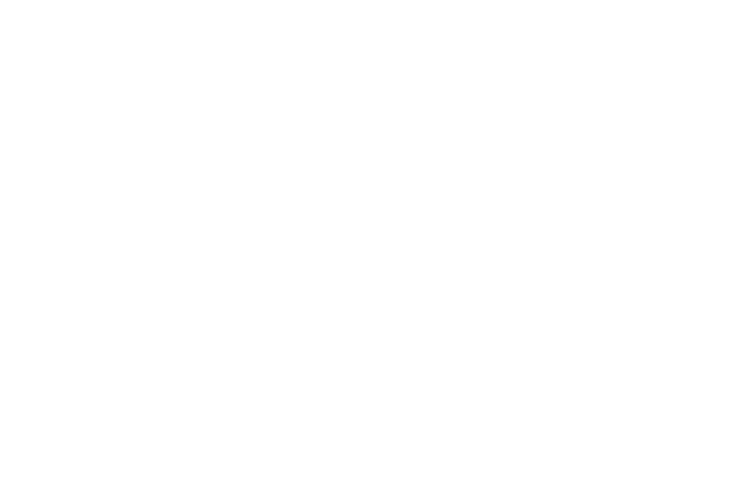

<IPython.core.display.Javascript object>


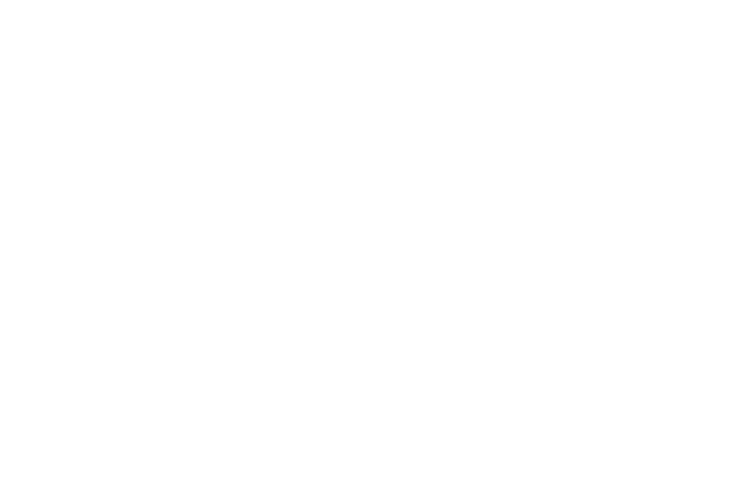

<IPython.core.display.Javascript object>


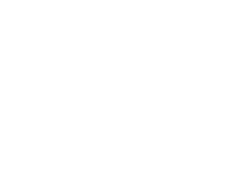

<IPython.core.display.Javascript object>


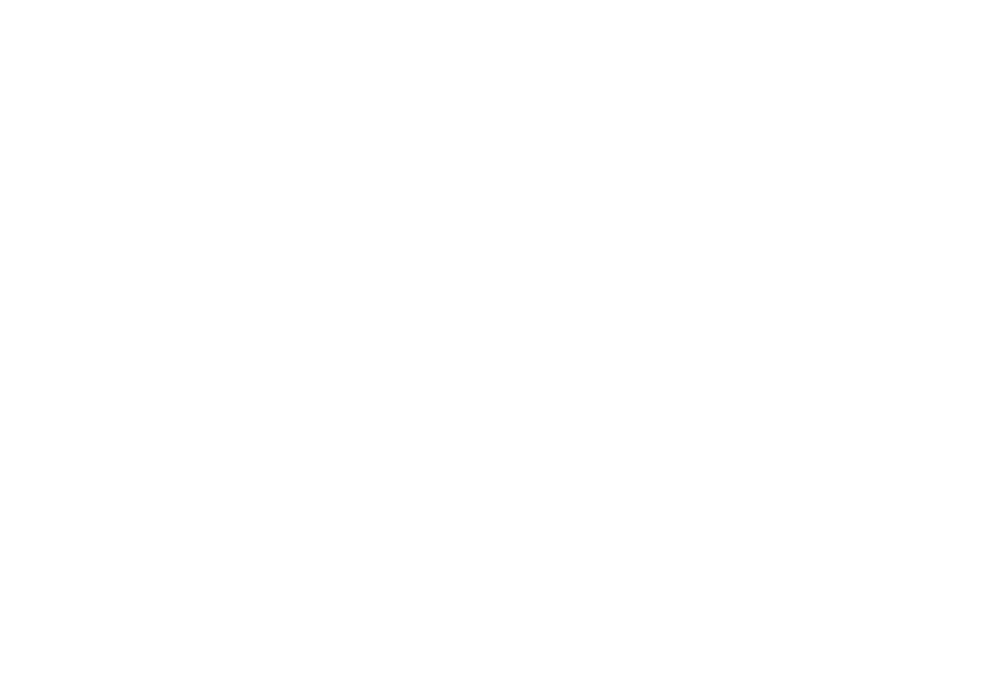

<IPython.core.display.Javascript object>


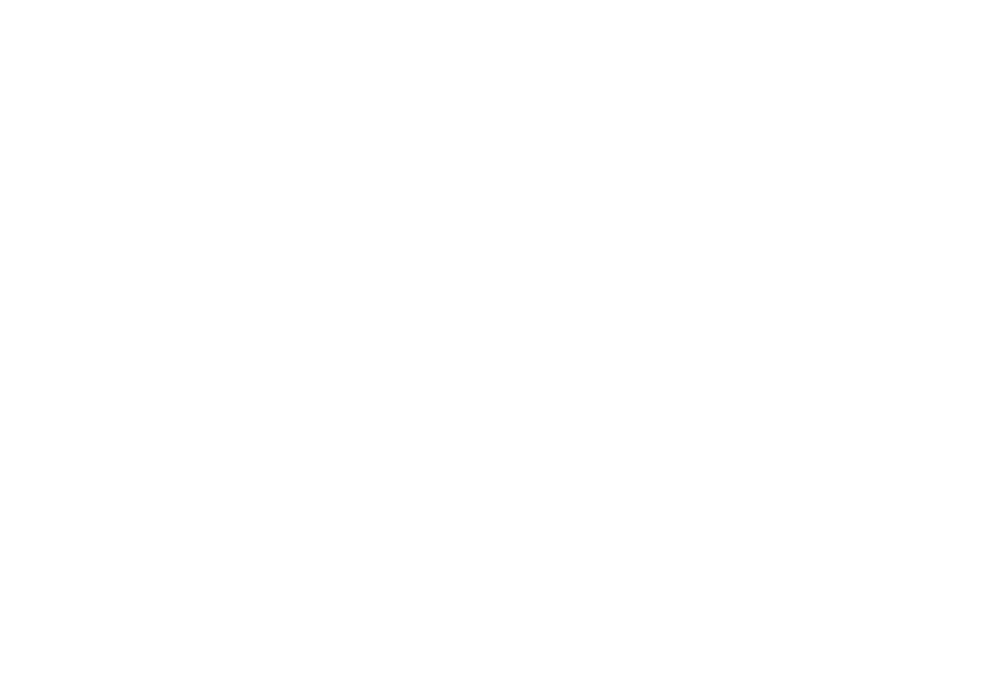

<IPython.core.display.Javascript object>


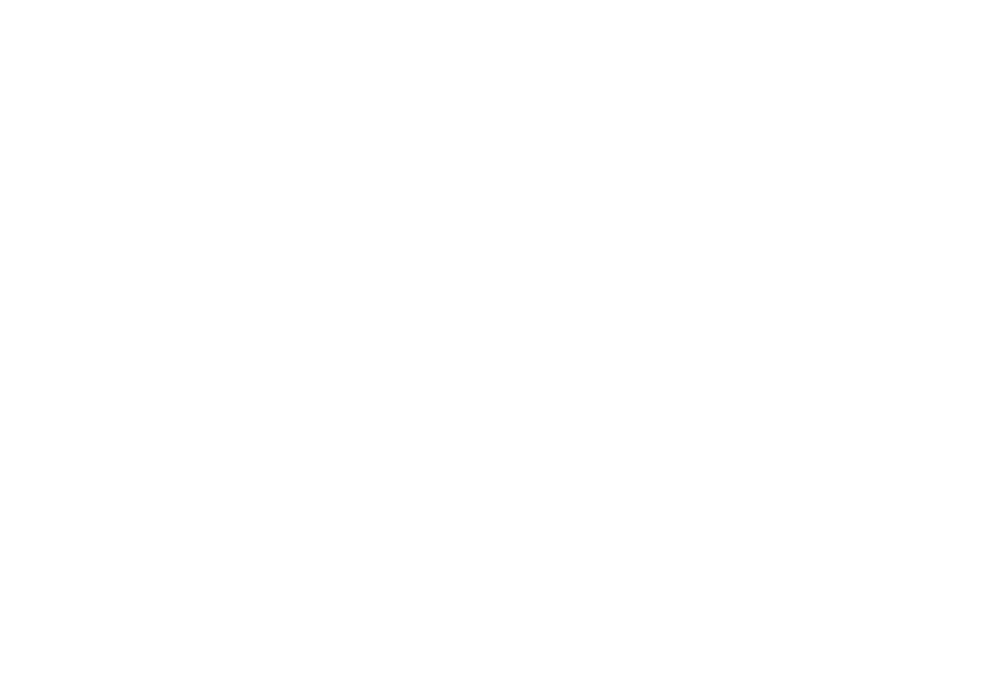

<IPython.core.display.Javascript object>


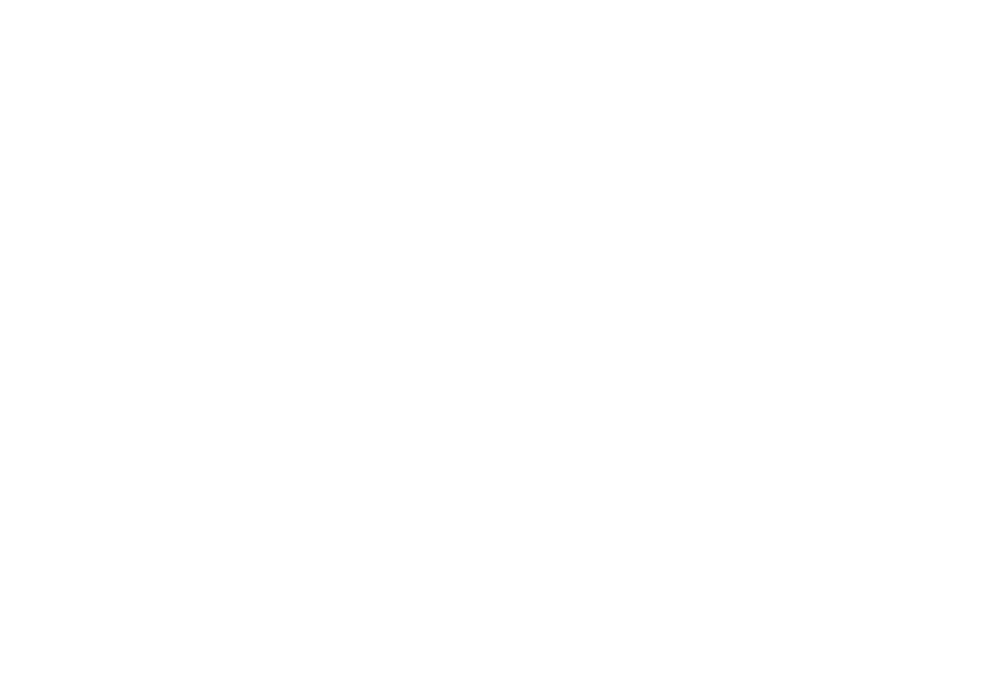

In [113]:
pp.ProfileReport(df_merge6)

<IPython.core.display.Javascript object>


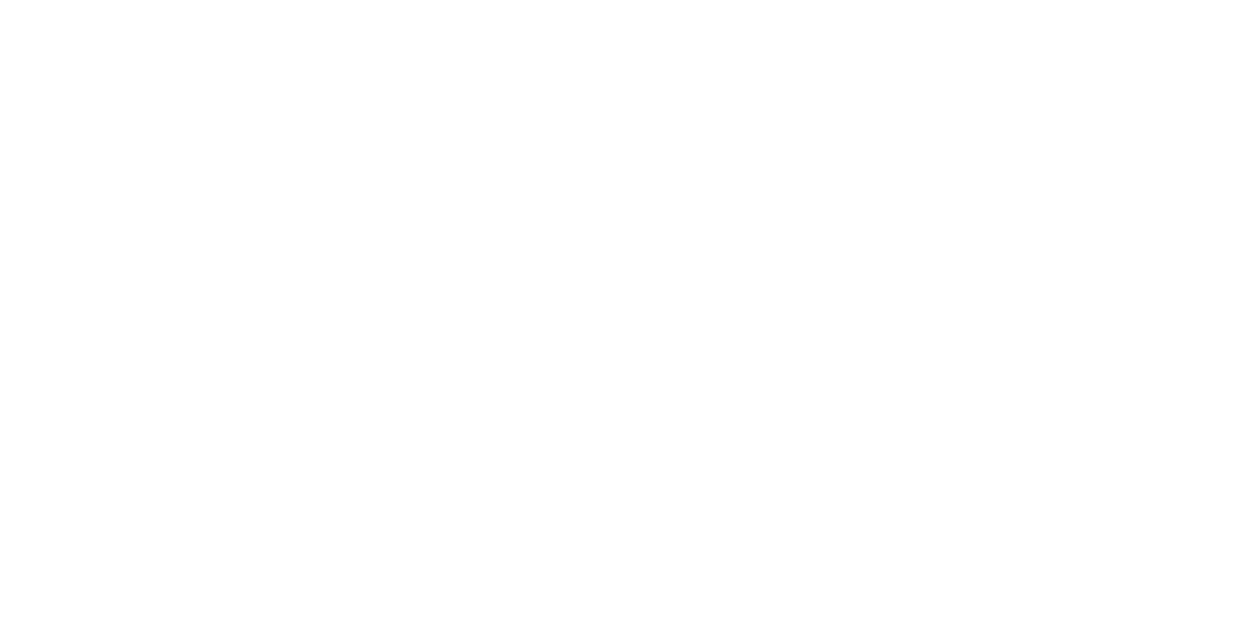

<IPython.core.display.Javascript object>


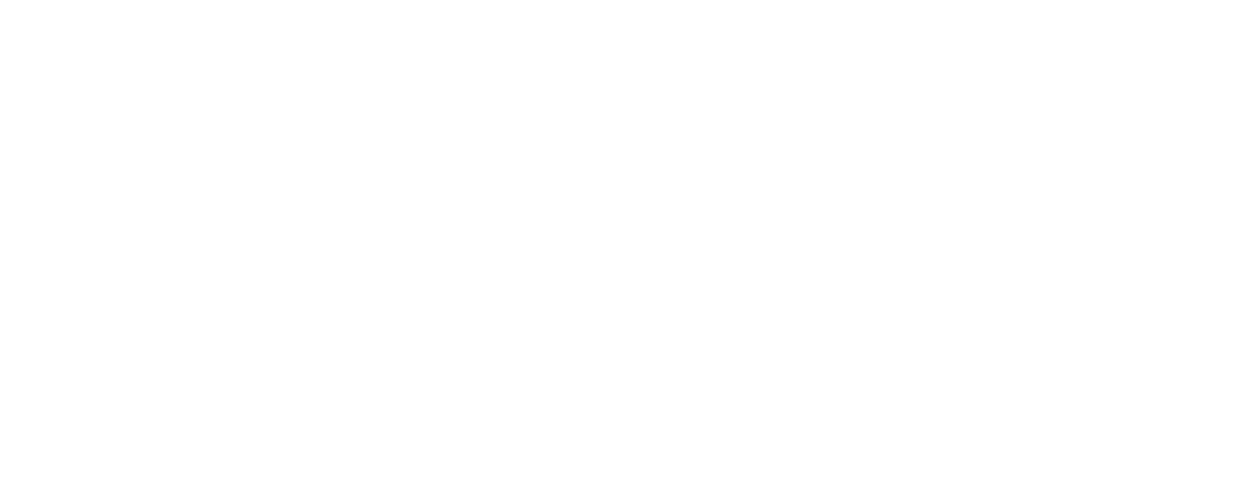

<IPython.core.display.Javascript object>


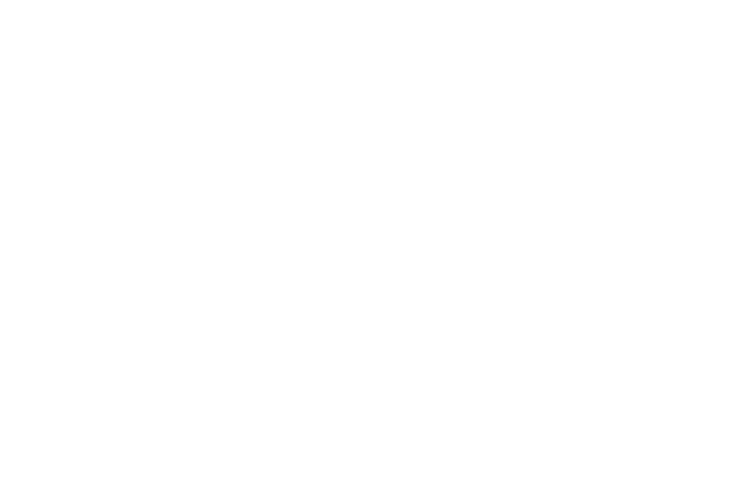

<IPython.core.display.Javascript object>


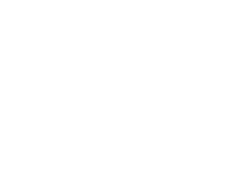

<IPython.core.display.Javascript object>


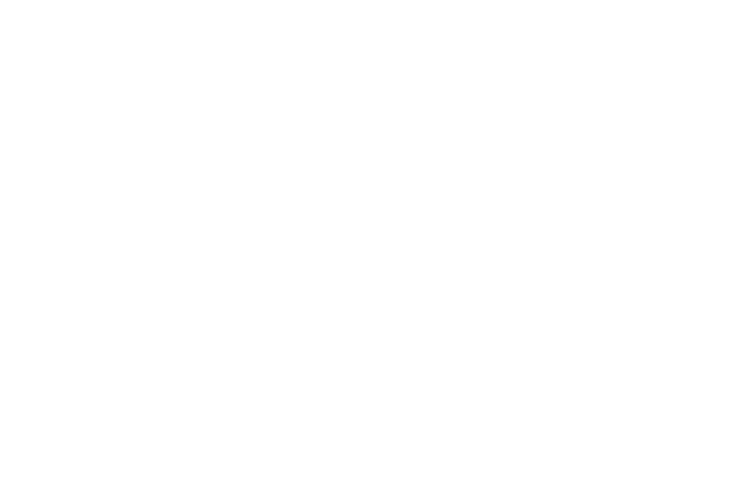

<IPython.core.display.Javascript object>


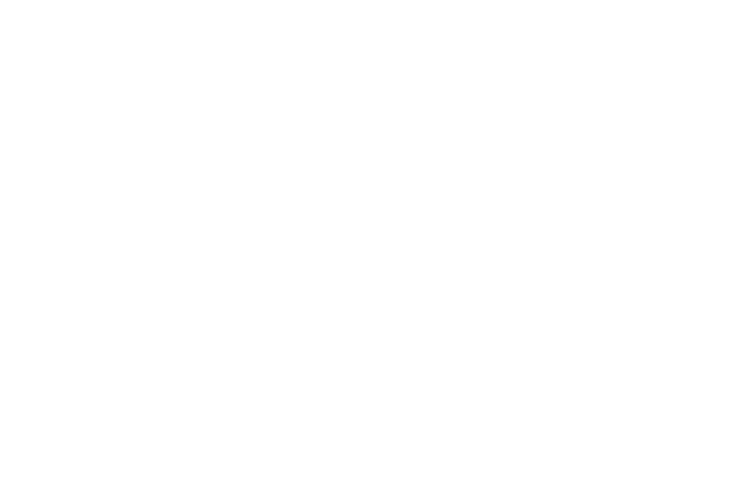

<IPython.core.display.Javascript object>


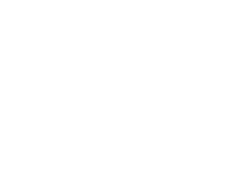

<IPython.core.display.Javascript object>


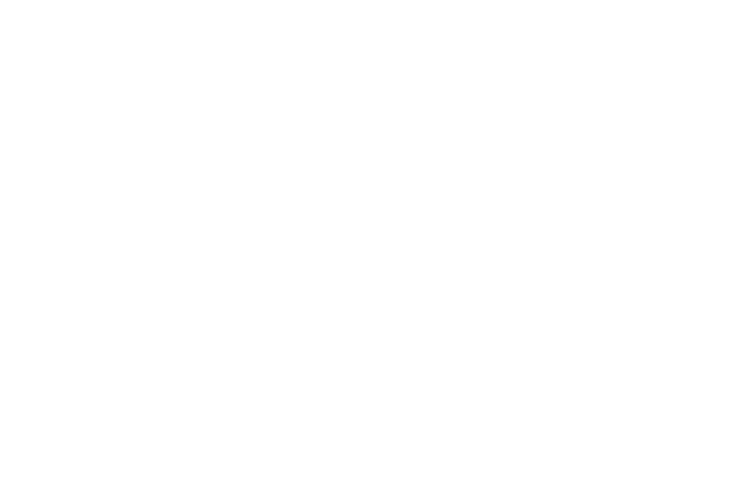

<IPython.core.display.Javascript object>


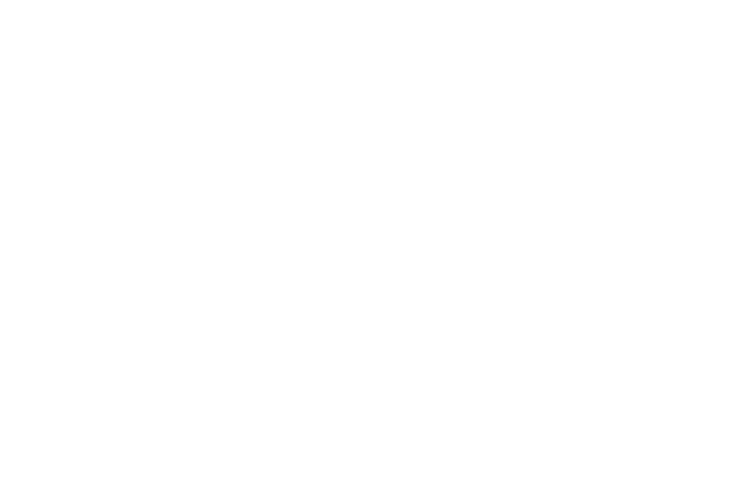

<IPython.core.display.Javascript object>


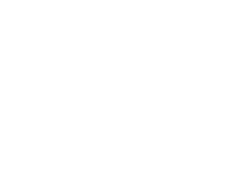

<IPython.core.display.Javascript object>


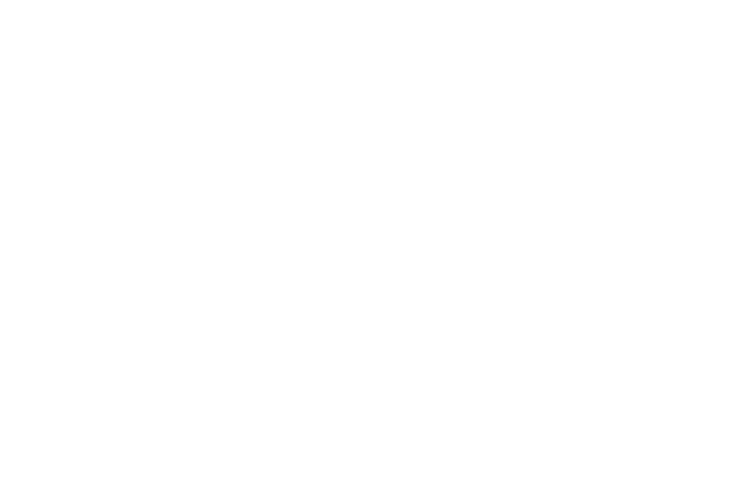

<IPython.core.display.Javascript object>


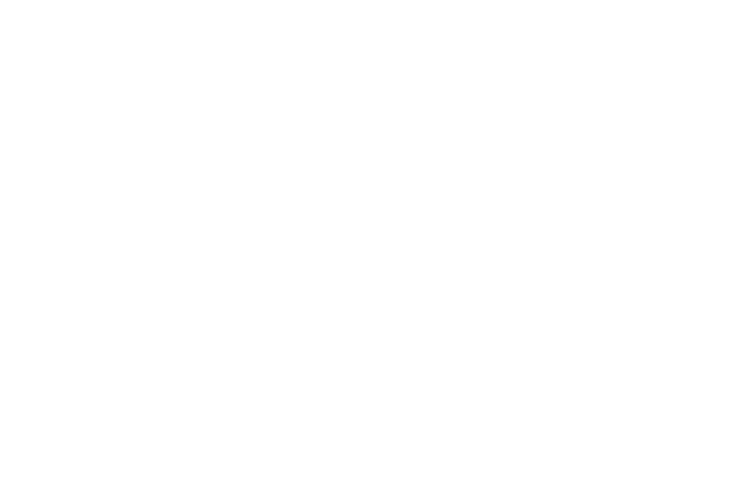

<IPython.core.display.Javascript object>


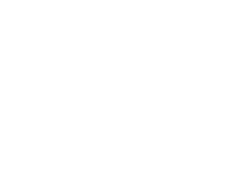

<IPython.core.display.Javascript object>


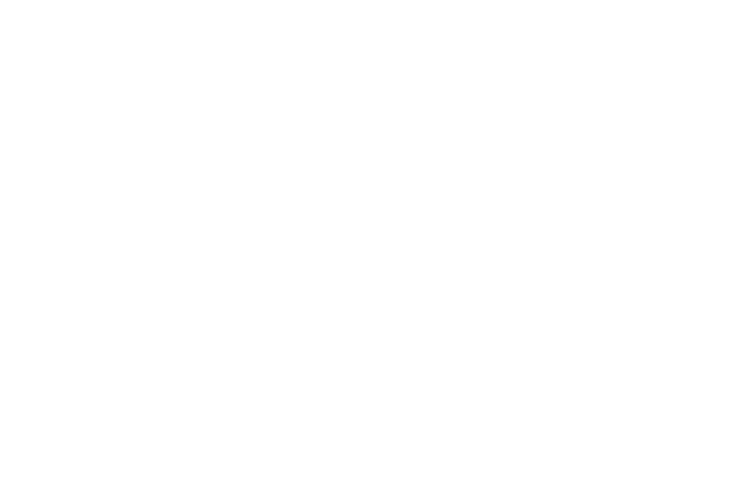

<IPython.core.display.Javascript object>


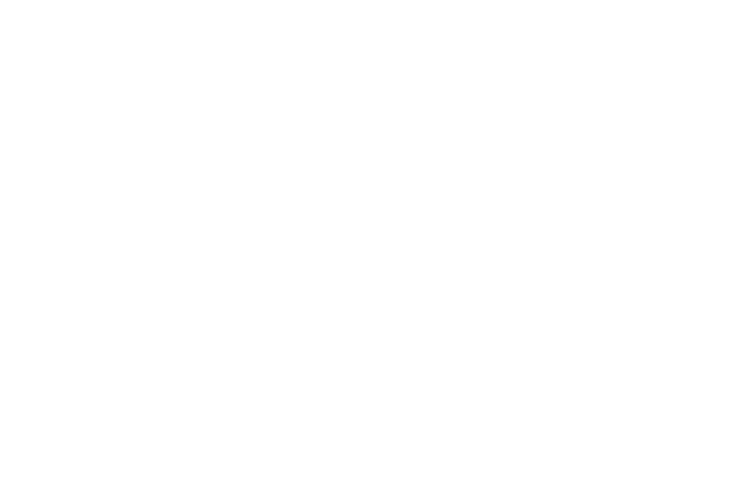

<IPython.core.display.Javascript object>


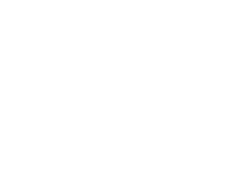

<IPython.core.display.Javascript object>


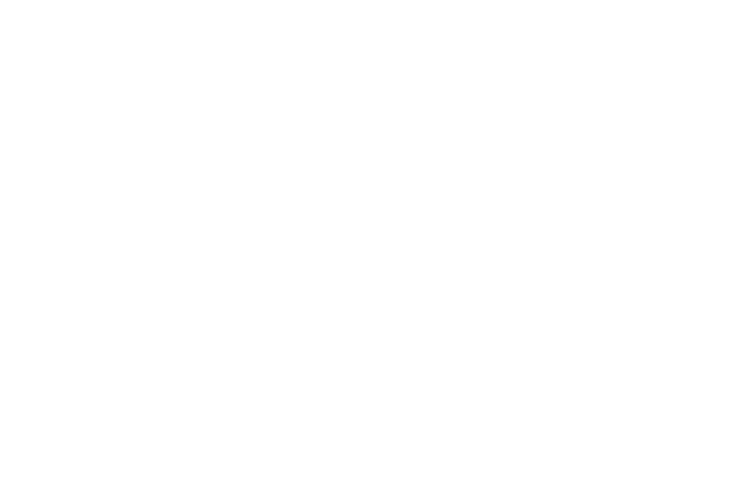

<IPython.core.display.Javascript object>


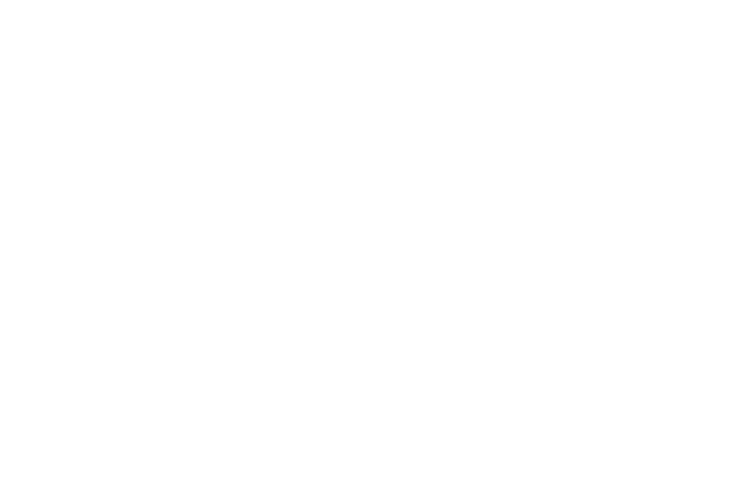

<IPython.core.display.Javascript object>


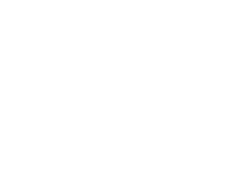

<IPython.core.display.Javascript object>


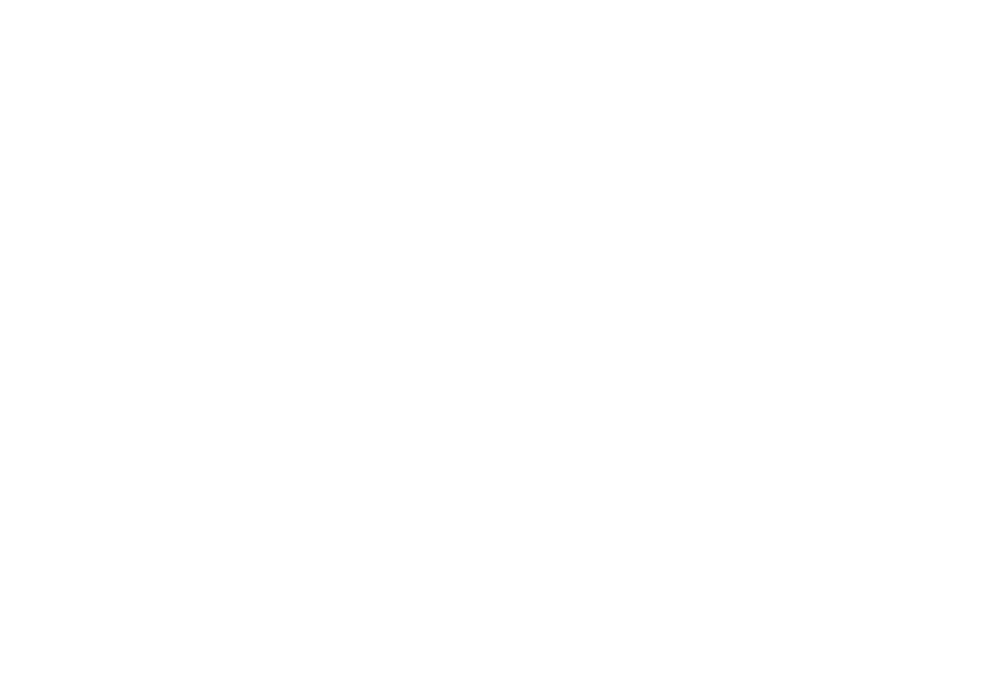

<IPython.core.display.Javascript object>


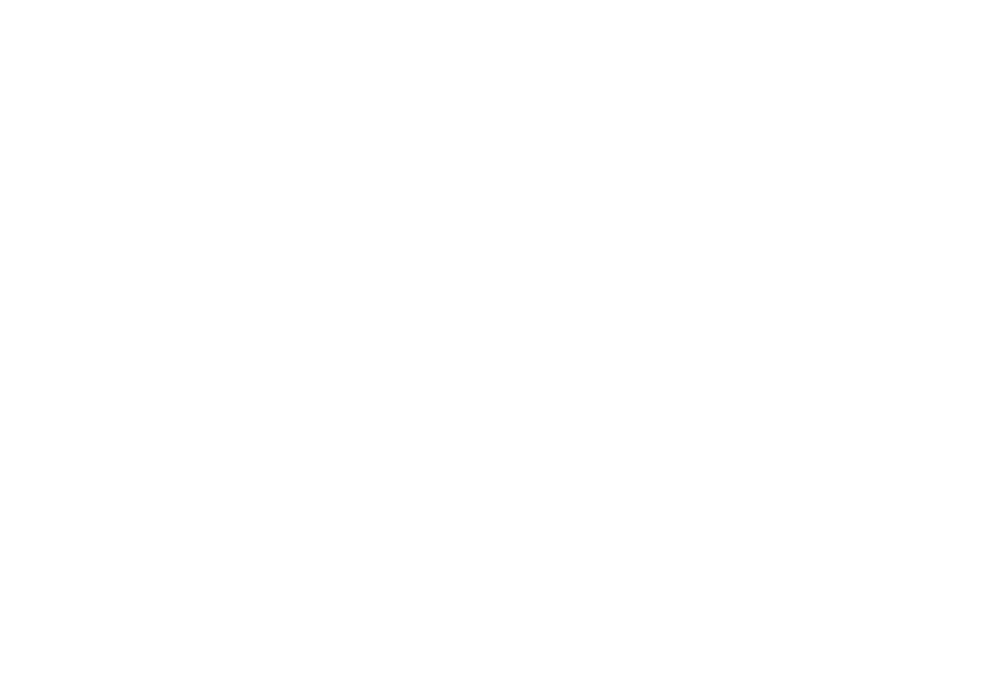

<IPython.core.display.Javascript object>


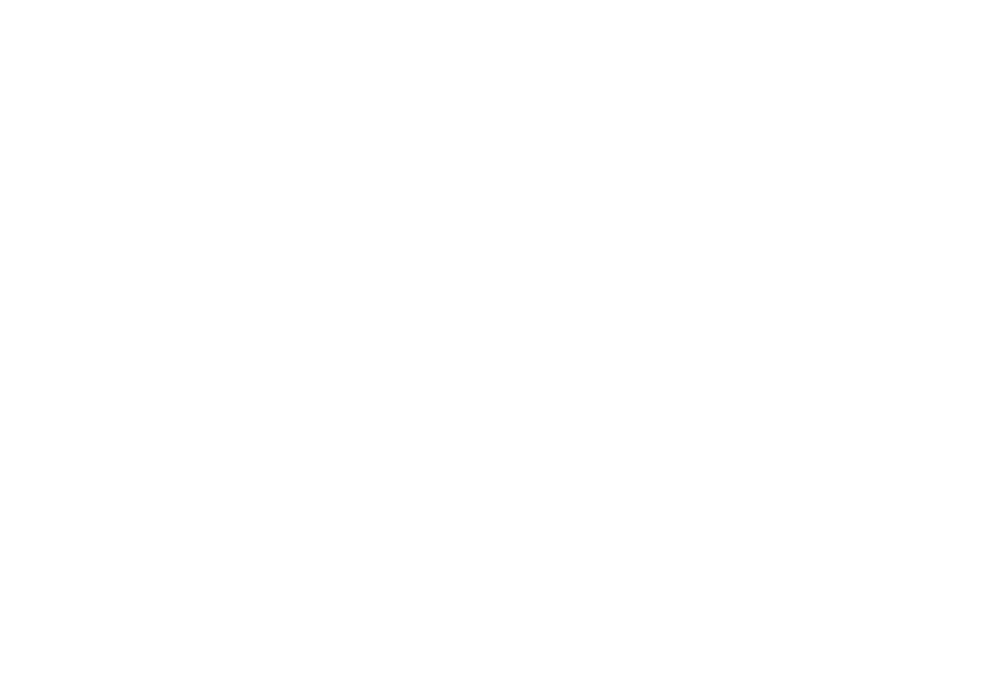

<IPython.core.display.Javascript object>


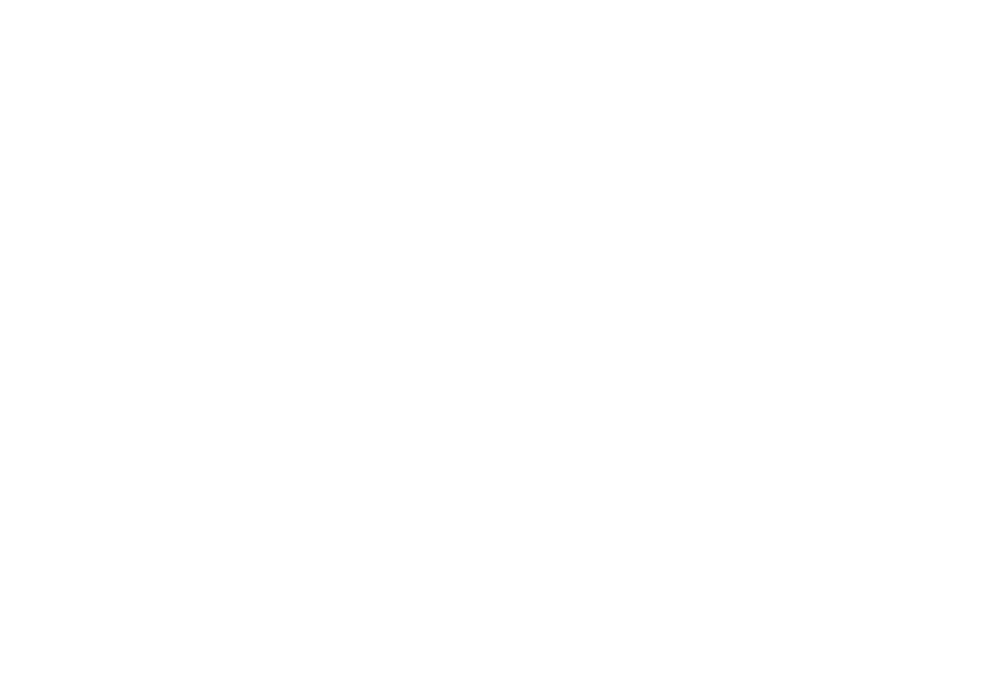

In [115]:
profile = df_merge6.profile_report(title='Pandas Profiling Report')
profile.to_file(output_file="output.html")

<IPython.core.display.Javascript object>


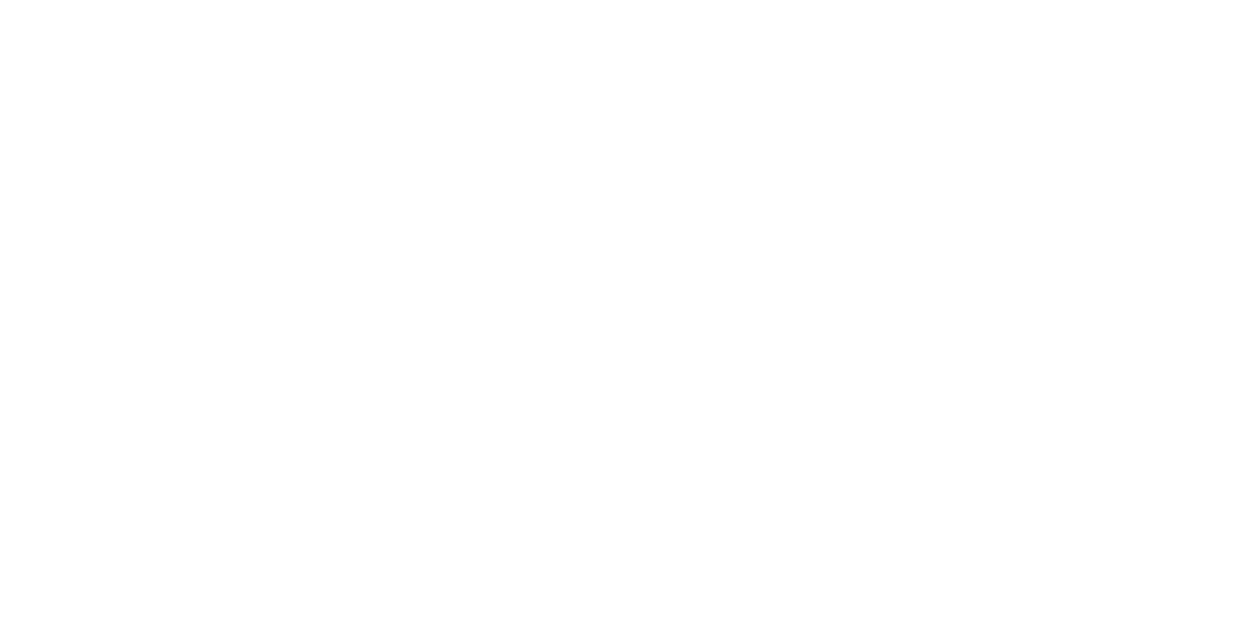

<IPython.core.display.Javascript object>


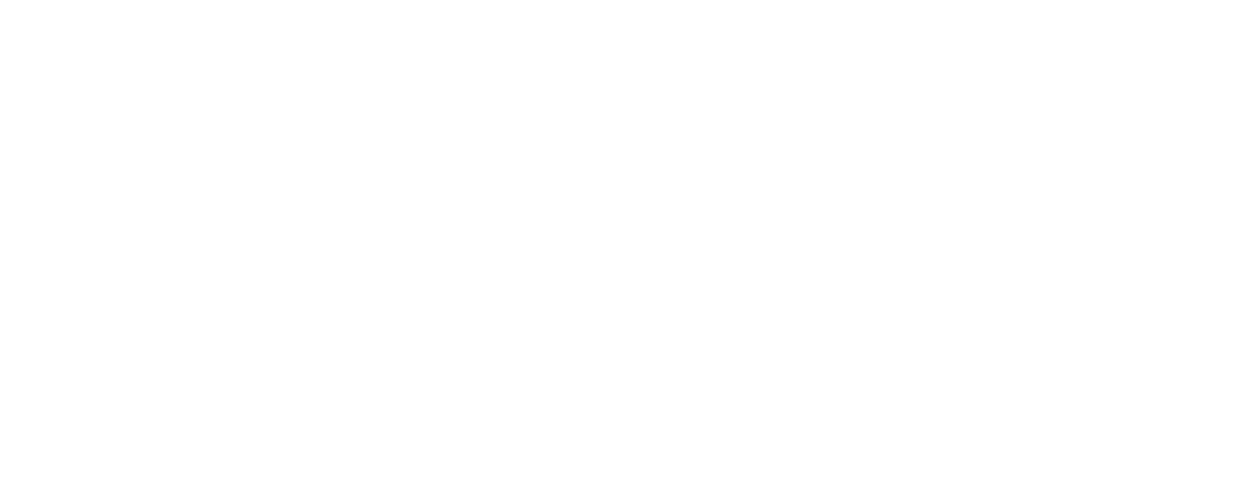

<IPython.core.display.Javascript object>


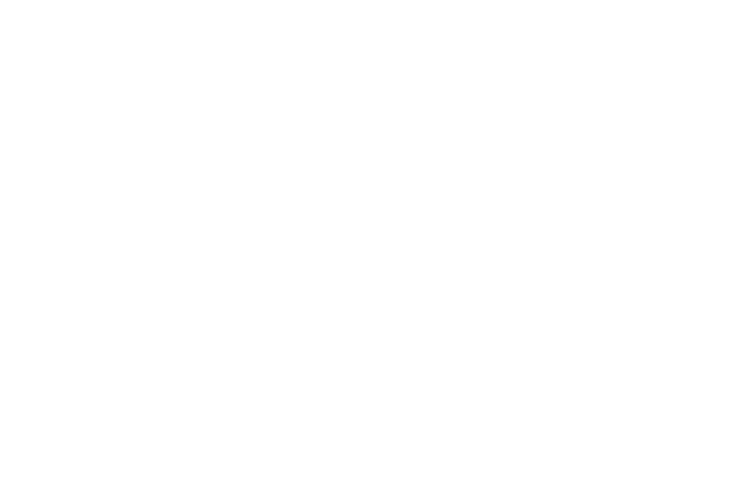

<IPython.core.display.Javascript object>


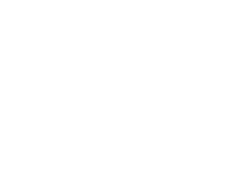

<IPython.core.display.Javascript object>


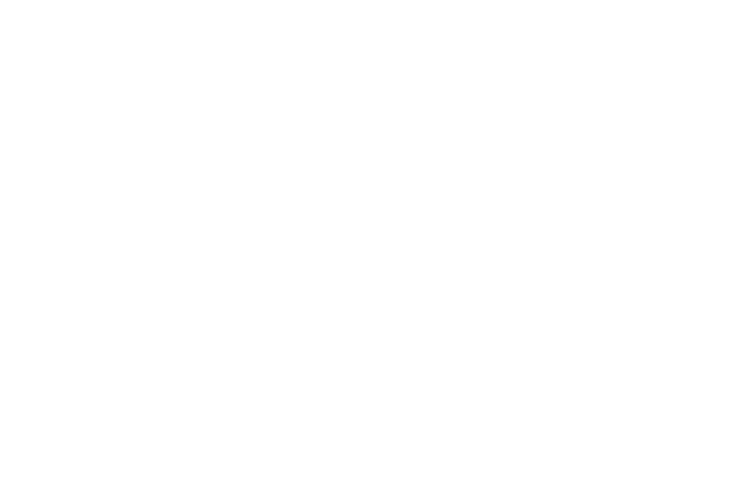

<IPython.core.display.Javascript object>


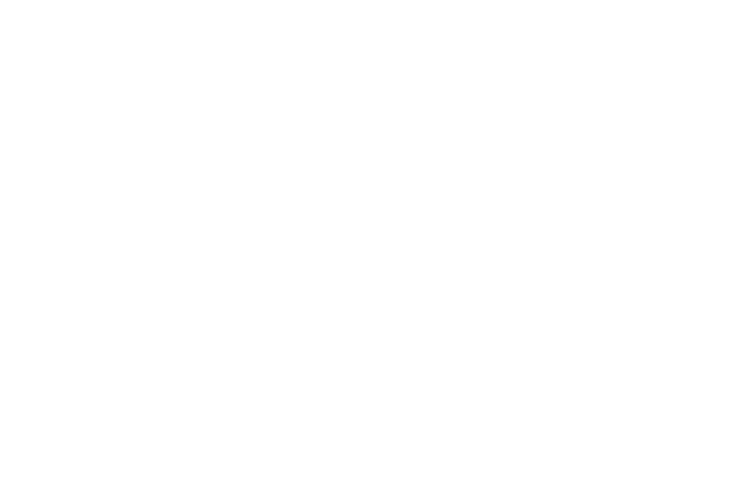

<IPython.core.display.Javascript object>


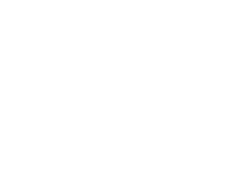

<IPython.core.display.Javascript object>


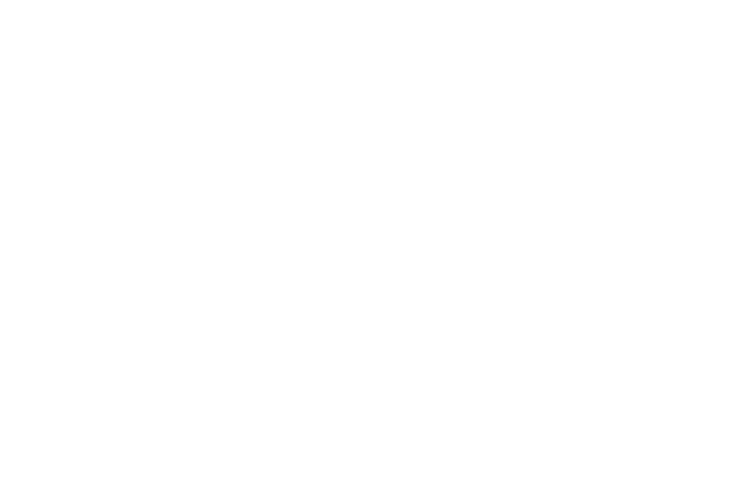

<IPython.core.display.Javascript object>


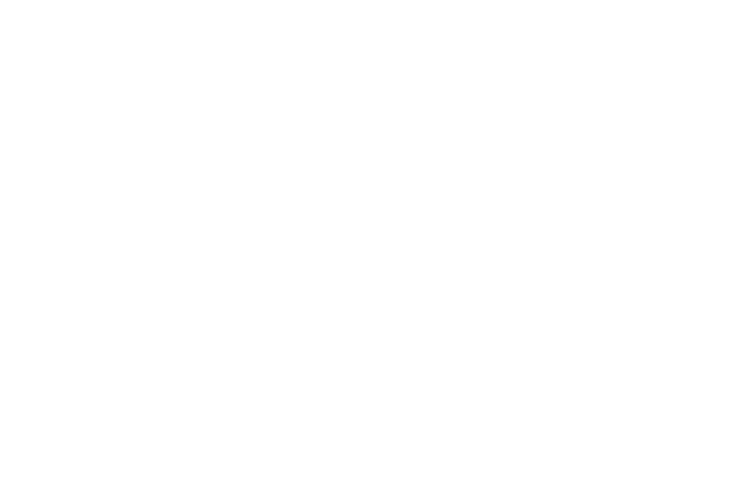

<IPython.core.display.Javascript object>


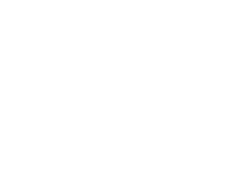

<IPython.core.display.Javascript object>


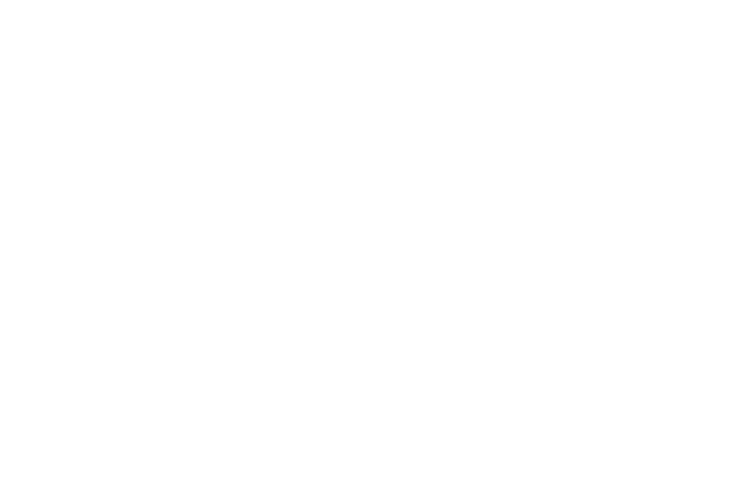

<IPython.core.display.Javascript object>


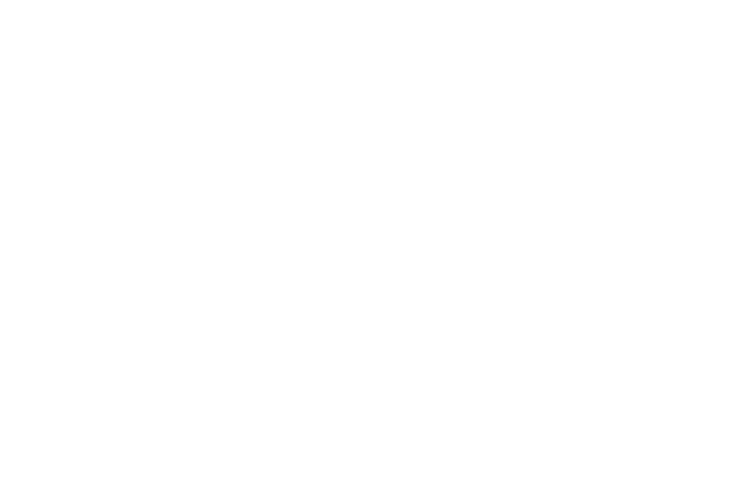

<IPython.core.display.Javascript object>


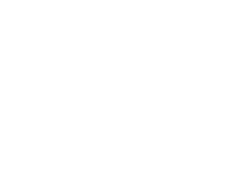

<IPython.core.display.Javascript object>


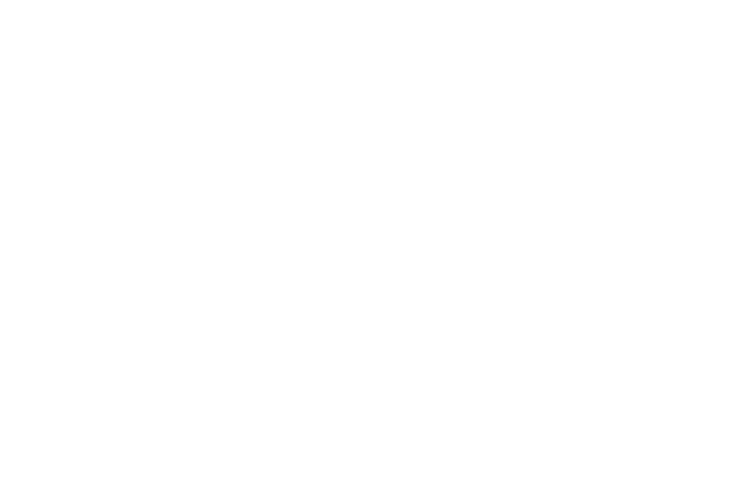

<IPython.core.display.Javascript object>


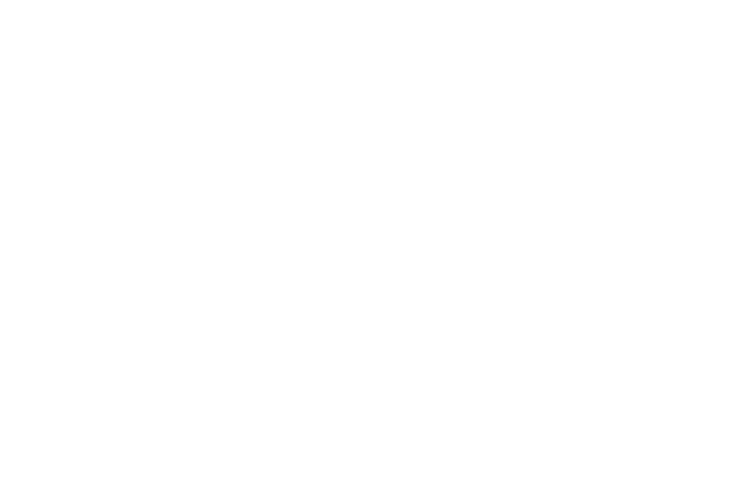

<IPython.core.display.Javascript object>


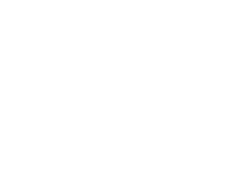

<IPython.core.display.Javascript object>


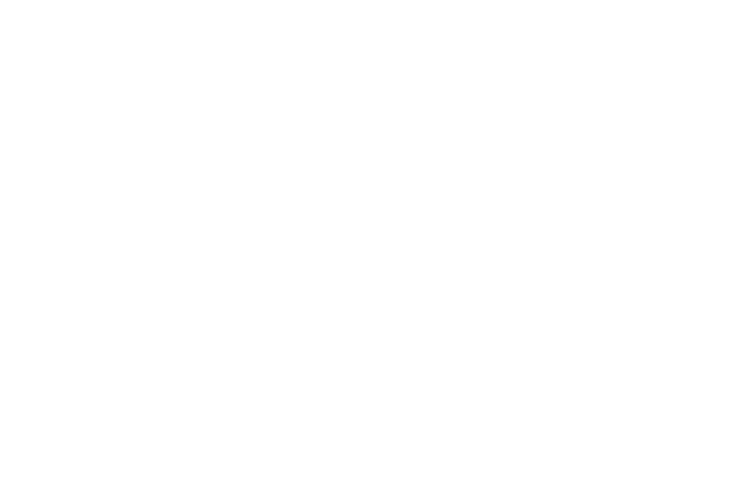

<IPython.core.display.Javascript object>


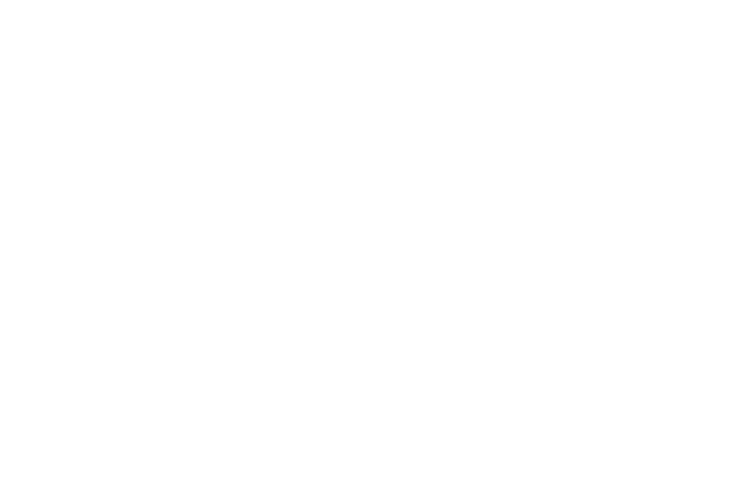

<IPython.core.display.Javascript object>


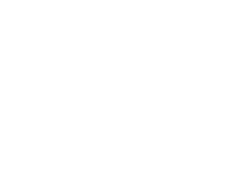

<IPython.core.display.Javascript object>


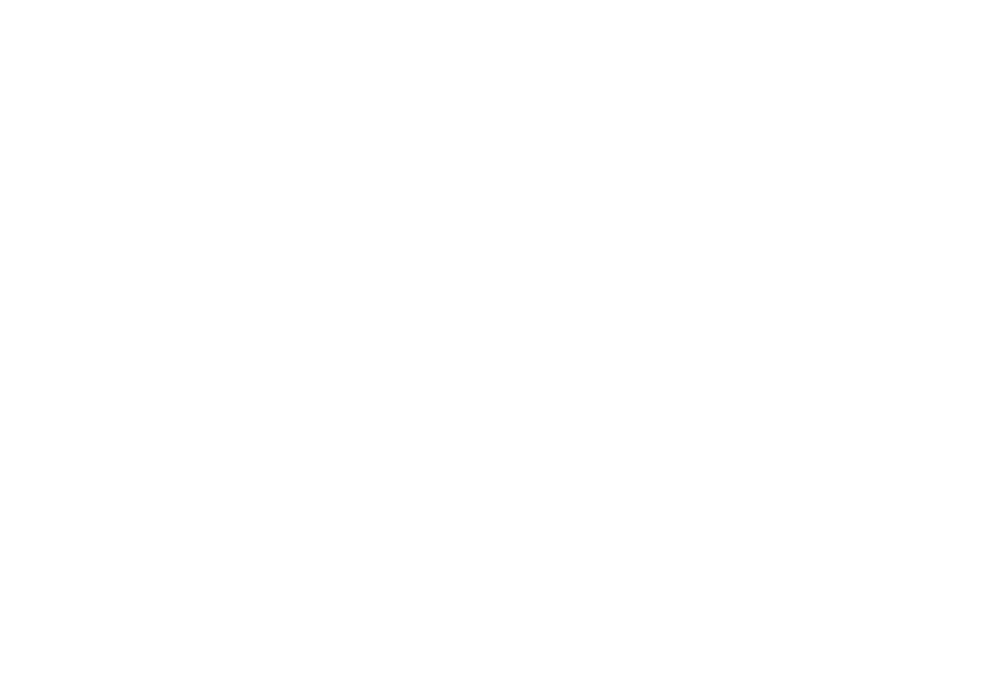

<IPython.core.display.Javascript object>


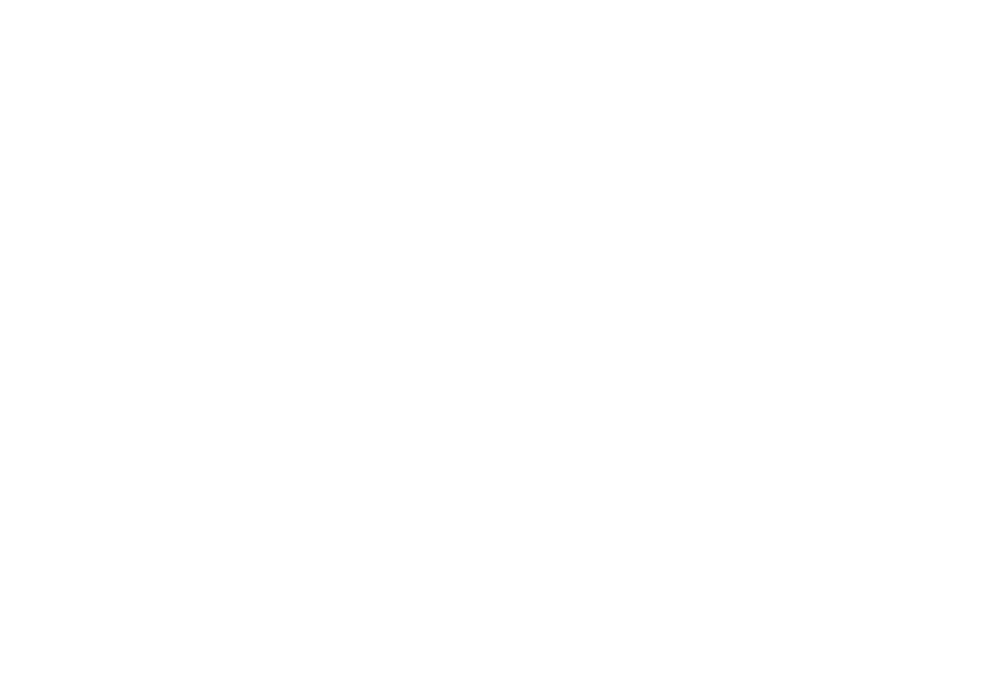

<IPython.core.display.Javascript object>


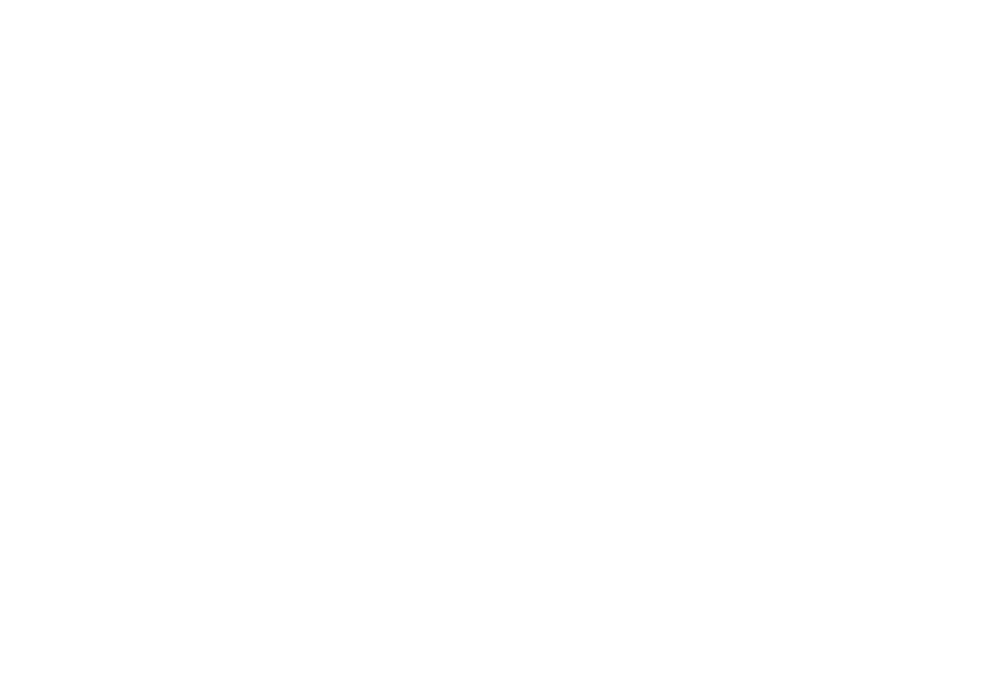

<IPython.core.display.Javascript object>


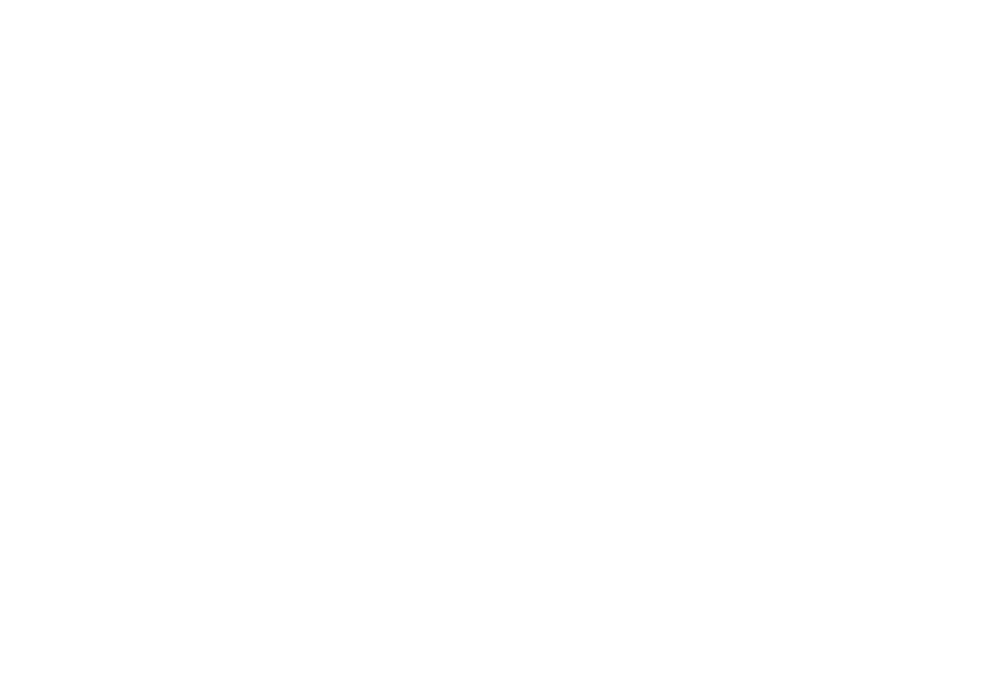

In [116]:
EDA = df_merge6.profile_report(style={'full_width':True})


In [34]:
#df_merge6.var() #df_merge6.skew(), df_merge6.kurt()

In [35]:
#df_merge6.skew()

In [36]:
#df_merge6.kurt()

In [37]:
# Interquartile range (IQR)
#from scipy.stats import iqr
#iqr(df_merge6['Close_price'])

In [38]:
# Interquartile of Price Forcasting
#iqr(df_merge6['LQC(coc_mpyn_prfr)']), iqr(df_merge6['LQC(coc_mpys_prfr)']), iqr(df_merge6['LQC(coc_mpyns_prfr)'])

In [39]:
# Interquartile of Weather Damage
#iqr(df_merge6['LQC(coc-mpyns-wdam)']), iqr(df_merge6['LQC(coc-mpyn-wdam)']), iqr(df_merge6['LQC(coc-mpys-wdam)'])

In [40]:
# Check the correlation between the variables (scatterplot matrix) with ‘hist’ for Histogram plot in the diagonal
#scat_plo = pd.plotting.scatter_matrix(df_merge6, alpha=0.2, figsize=(25, 20), diagonal='hist')

In [41]:
# # Check the correlation between the variables (scatterplot matrix) with ‘kde’ Kernel Density Estimation 
#scat_plo2 = pd.plotting.scatter_matrix(df_merge6, alpha=0.2, figsize=(25, 20), diagonal='kde')

In [42]:
# Check the correlation between the variables (Correlation Matrix)
# Calculate the correlation cooeficient between the variables (Pearson correlation coefficient)
correlations = df_merge6.corr()
correlations

Close_price  LQC(coc_mpyns_prfr)  LQC(coc_mpys_prfr)  \
Close_price             1.000000             0.104243            0.030297   
LQC(coc_mpyns_prfr)     0.104243             1.000000            0.023747   
LQC(coc_mpys_prfr)      0.030297             0.023747            1.000000   
LQC(coc_mpyn_prfr)      0.104243             1.000000            0.023747   
LQC(coc-mpyns-wdam)    -0.290673            -0.067030           -0.009772   
LQC(coc-mpyn-wdam)      0.072266             0.006496           -0.012036   
LQC(coc-mpys-wdam)     -0.290673            -0.067030           -0.009772   

                     LQC(coc_mpyn_prfr)  LQC(coc-mpyns-wdam)  \
Close_price                    0.104243            -0.290673   
LQC(coc_mpyns_prfr)            1.000000            -0.067030   
LQC(coc_mpys_prfr)             0.023747            -0.009772   
LQC(coc_mpyn_prfr)             1.000000            -0.067030   
LQC(coc-mpyns-wdam)           -0.067030             1.000000   
LQC(coc-mpyn-wdam)             0.006496             0.071102   
LQC(coc-mpys-wdam)            -0.067030             1.000000   

                     LQC(coc-mpyn-wdam)  LQC(coc-mpys-wdam)  
Close_price                    0.072266           -0.290673  
LQC(coc_mpyns_prfr)            0.006496           -0.067030  
LQC(coc_mpys_prfr)            -0.012036           -0.009772  
LQC(coc_mpyn_prfr)             0.006496           -0.067030  
LQC(coc-mpyns-wdam)            0.071102            1.000000  
LQC(coc-mpyn-wdam)             1.000000            0.071102  
LQC(coc-mpys-wdam)             0.071102            1.000000

(https://pythonfordatascience.org/variance-covariance-correlation/)
If the correlation coefficient value is positive, it means as one variable increase so does the other, and if the correlation coefficient value is negative, it means as one variable increases the other decreases. If the correlation coefficient is negative, the way to see which variable increases/decreases is to plot the data. It’s usually plotted as a scatter plot.

There are not set standards for what is considered a weak or strong correlation. It’s usually field dependent, but a guideline is below.

r value	     versus       Strength          
0.0 – 0.2	       Weak correlation,  
     0.3 – 0.6	         Moderate correlation,  
     0.7 – 1.0	         Strong correlation,


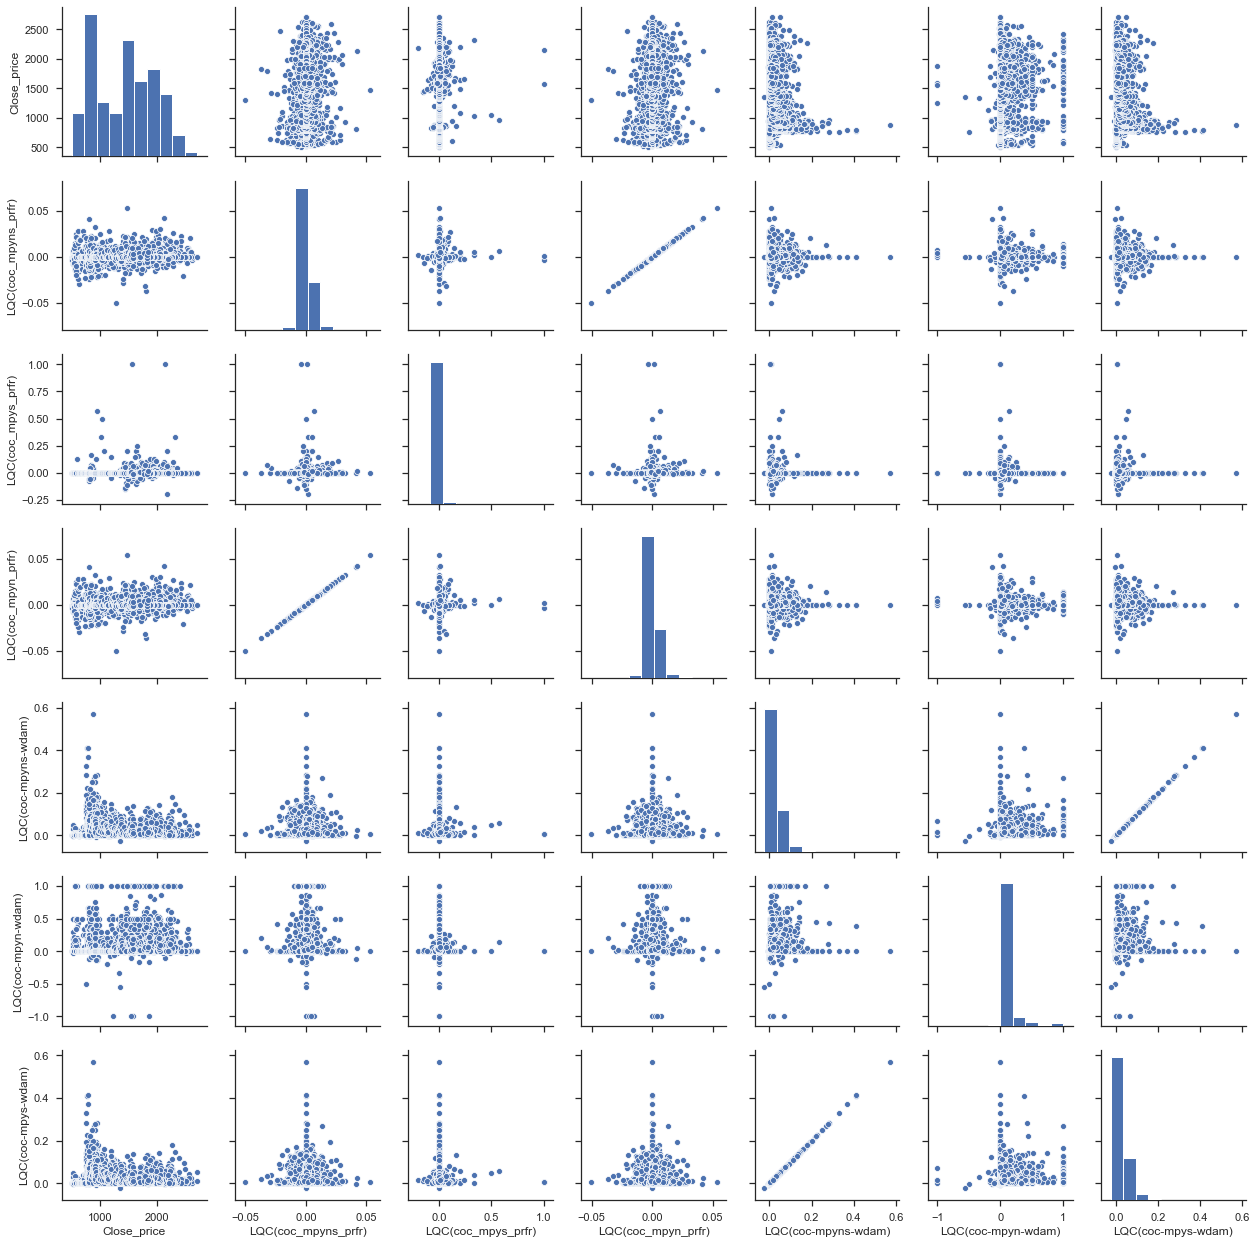

In [43]:
# Pairplot to visualize the correlation between the variables
sns.set(style="ticks", color_codes=True)
g = sns.pairplot(df_merge6)

In [44]:
# g = sns.PairGrid(df_merge6, diag_sharey=False)
# g.map_lower(sns.kdeplot)
# g.map_upper(sns.scatterplot)
# g.map_diag(sns.kdeplot, lw=3)

In [45]:
# PCA
from sklearn.preprocessing import StandardScaler
features = ['LQC(coc_mpyns_prfr)', 'LQC(coc_mpys_prfr)', 'LQC(coc_mpyn_prfr)', 'LQC(coc-mpyns-wdam)', 'LQC(coc-mpyn-wdam)','LQC(coc-mpys-wdam)']

In [46]:
# Take ,out the feature
x = df_merge6.loc[:, features].values
x

array([[ 0.      ,  0.      ,  0.      ,  0.      ,  0.      ,  0.      ],
       [ 0.      ,  0.      ,  0.      ,  0.      ,  0.      ,  0.      ],
       [-0.004343,  0.      , -0.004343,  0.006369,  0.095238,  0.006369],
       ...,
       [ 0.002116, -0.011299,  0.002116,  0.004647,  0.033898,  0.004647],
       [-0.032258,  0.071685, -0.032258,  0.033162,  0.065711,  0.033162],
       [ 0.005153,  0.015867,  0.005153,  0.016532,  0.0595  ,  0.016532]])

In [47]:
# Separating out the target
y = df_merge6.loc[:,['Close_price']].values
y

array([[ 561],
       [ 560],
       [ 556],
       ...,
       [1836],
       [1796],
       [1842]])

In [48]:
# Standardizing the features
x = StandardScaler().fit_transform(x) #dataset’s features onto unit scale (mean = 0 and variance = 1)
x

array([[-0.17275855, -0.0688342 , -0.17275855, -0.76148392, -0.38459559,
        -0.76148392],
       [-0.17275855, -0.0688342 , -0.17275855, -0.76148392, -0.38459559,
        -0.76148392],
       [-1.08280963, -0.0688342 , -1.08280963, -0.5708418 ,  0.19232129,
        -0.5708418 ],
       ...,
       [ 0.27063728, -0.47998059,  0.27063728, -0.62238611, -0.17925394,
        -0.62238611],
       [-6.93223998,  2.53962929, -6.93223998,  0.23114823,  0.01345755,
         0.23114823],
       [ 0.90702346,  0.50853192,  0.90702346, -0.26663455, -0.02416641,
        -0.26663455]])

In [49]:
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['prin_comp_1', 'principal_comp_2', 'prin_comp_3'])
principalDf.head() #  How do I know which of the feature is with which one is compressed

prin_comp_1  principal_comp_2  prin_comp_3
0    -0.621607         -0.953415     0.088439
1    -0.621607         -0.953415     0.088439
2     0.499295         -1.641229    -0.195010
3    -1.070769         -0.489355     0.079335
4     2.436853         -4.113318     0.150426

In [50]:
# Concatinate the features with the target
# pd.concat([s1, s2])

In [51]:
# To see how much information we lose when we convevrt 6 dimentional into 3 dimention
pca.explained_variance_ratio_ # (Add them up)This shows nthat almost around 82% of the information is contained in those converted principla components

array([0.35646889, 0.31215422, 0.16772676])

### 1.4 Feature extraction

### 1.5 Exploratory data analysis 

#### First let's see Which of those time series has an impact on cocoa future price one by one with ?
1. (Check the time series) Check close price with Time in deferent way (Yearly, monthly)(first change the datatype of vlose price to integer)
2. Check LQC(coc_mpyns_prfr) with time time (Impacts of this news value with each timestamp yearly, monthly)
3. Check LQC(coc_mpys_prfr) with time time (Impacts of this news value with each timestamp yearly, monthly)
4. Check LQC(coc_mpyn_prfr) with time time (Impacts of this news value with each timestamp yearly, monthly)
5. Check LQC(coc-mpyns-wdam) with time time (Impacts of this news value with each timestamp yearly, monthly)
6. Check LQC(coc-mpyn-wdam) with time time (Impacts of this news value with each timestamp yearly, monthly)
7. Check LQC(coc-mpys-wdam) with time time (Impacts of this news value with each timestamp yearly, monthly)
8. Are those six of the feauture correlate each other(Is there correlation between them)?

* Principal Component Analysis (PCA)
* CHi-square
* moving-window average

Under information taken from this book :-> 
"Applied multivariate Statistical Analysis (4th edition)"
"PRIMER of Bio-Statstics (4th edition)"

Correspondence analysis: - main idea is to develop simple indices that will show the relationship between the rows and columns 
                          categories. These indices will tell as simultaneously which column categories have more weight in a 
                     raw catagory and vice versa. It provides tools for analyzing the association between rows and columns of 
                   contingency tables. The contingency table is a two-entry frequency table where the joint frequencies of two 
                    qualitative variables are reported.
                     
Like principal component analysis, correspondence analysis is also related to the issue of reducing the dimension of the table. Additionally, the issue of decomposing the table into its factors, here the idea is to extract the indices in decreasing order of importance so that the main information of the table can be summarized in spaces with smaller dimensions’ example: if only two factors (indices) are used the result can be shown in two dimensional graphs, showing the relationship between the rows and columns of the table. 
    
Chi-square decomposition: - An alternative way of measuring the assocciation between the row and column catagories is a decomposition of the value of the X square of 2 test statstics. 

PCA (Principal Component Analysis)


###### 2. Check LQC(coc_mpyns_prfr)

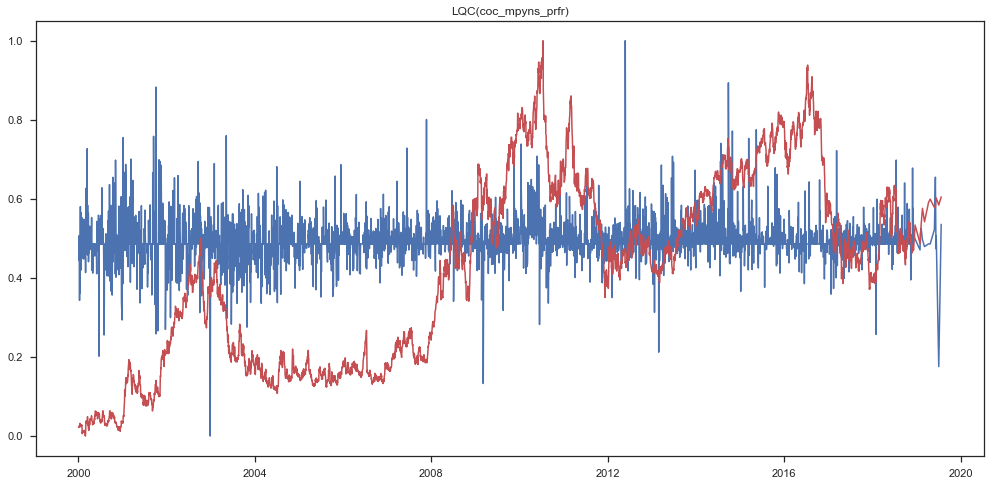

In [52]:
x= df_merge6['Timestamp']

y= df_merge6['LQC(coc_mpyns_prfr)']
y = (y - y.min())/(y.max()-y.min())

z= df_merge6['Close_price']
z = (z - z.min())/(z.max()-z.min())

plt.figure(figsize=(17, 8))
plt.grid(False)
plt.title("LQC(coc_mpyns_prfr)")
plt.plot(x,y, color = 'b')
plt.plot(x,z, color = 'r')
plt.show()

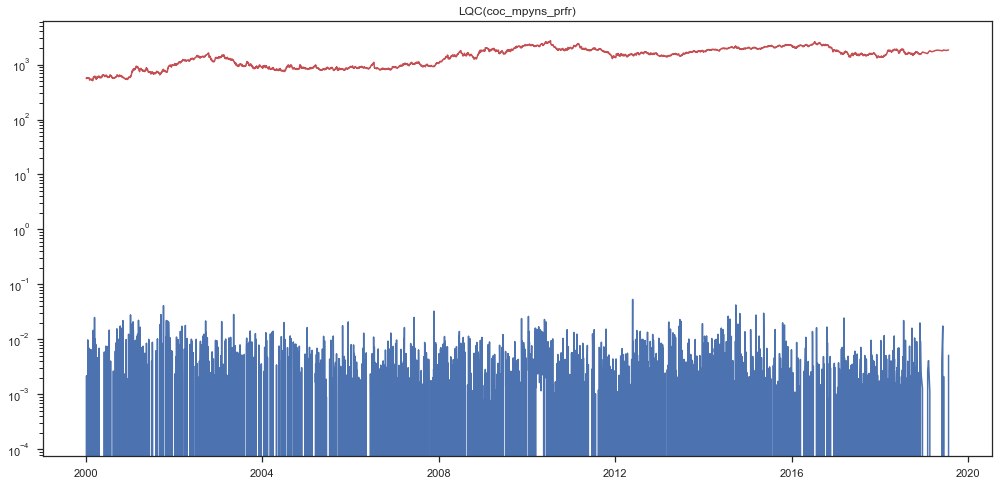

In [53]:
x= df_merge6['Timestamp']

y= df_merge6['LQC(coc_mpyns_prfr)']
#y = (y - y.min())/(y.max()-y.min())

z= df_merge6['Close_price']
#z = (z - z.min())/(z.max()-z.min())

plt.figure(figsize=(17, 8))
plt.grid(False)
plt.title("LQC(coc_mpyns_prfr)")
plt.plot(x,y, color = 'b')
plt.plot(x,z, color = 'r')
plt.yscale('log')
plt.show()

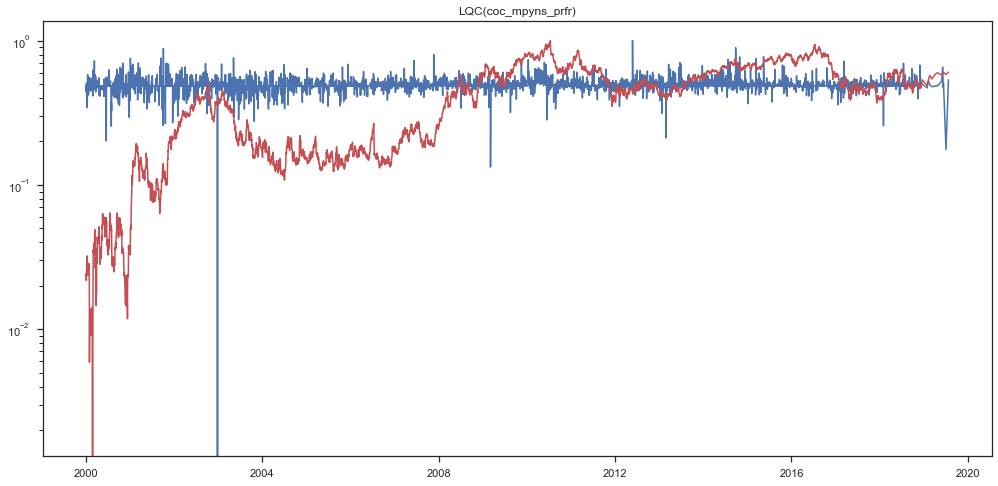

In [54]:
x= df_merge6['Timestamp']

y= df_merge6['LQC(coc_mpyns_prfr)']
y = (y - y.min())/(y.max()-y.min())

z= df_merge6['Close_price']
z = (z - z.min())/(z.max()-z.min())

plt.figure(figsize=(17, 8))
plt.grid(False)
plt.title("LQC(coc_mpyns_prfr)")
plt.plot(x,y, color = 'b')
plt.plot(x,z, color = 'r')
plt.yscale('log')
plt.show()

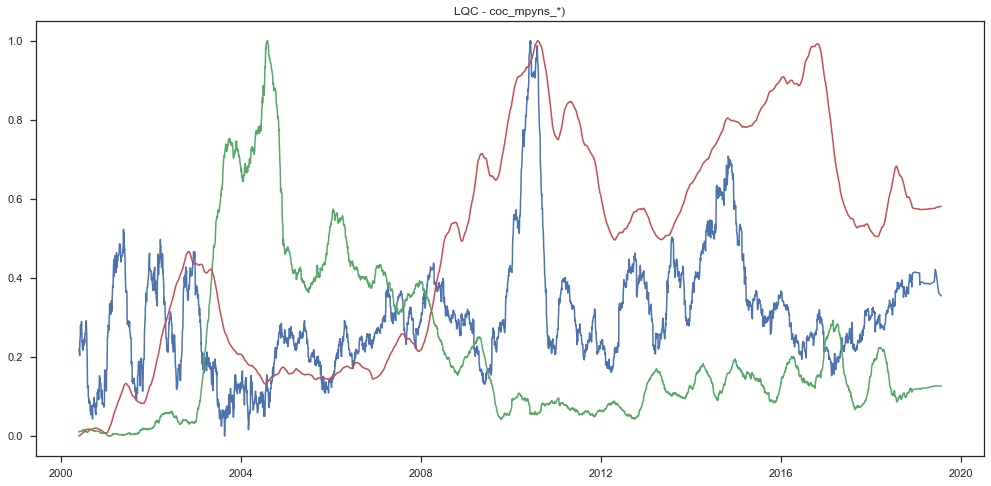

In [55]:
x= df_merge6['Timestamp']

wsize = 100

y1= df_merge6['LQC(coc_mpyns_prfr)'].rolling(wsize).mean()
y1 = (y1 - y1.min())/(y1.max()-y1.min())

y2= df_merge6['LQC(coc-mpyns-wdam)'].rolling(wsize).mean()
y2 = (y2 - y2.min())/(y2.max()-y2.min())

z= df_merge6['Close_price'].rolling(wsize).mean()
z = (z - z.min())/(z.max()-z.min())

plt.figure(figsize=(17, 8))
plt.grid(False)
plt.title("LQC - coc_mpyns_*)")
plt.plot(x,y1, color = 'b')
plt.plot(x,y2, color = 'g')
plt.plot(x,z, color = 'r')
plt.show()